# **Milestone 1 Phase 1**

# **I. Perkenalan**

Nama : Muhammad Farhan Darmawan

Batch : RMT 019

## **Objective :**

Problem Statement :

Memprediksi klien apakah kartu kredit mereka default menunggak atau tidak menggunakan Logistir regression, Support Vector Machine, Decision Tree, Random Forest, KNN, Naive Bayes, and AdaBoost

Latar Belakang :

Suatu perusahaan Bank meng-hire kamu sebagai data scientist untuk melakukan prediksi kepada klien yang memiliki kartu debit apakah nantinya klien tersebut ter-validasi menunggak (default) atau tidak menggunakan machine learning dengan beberapa pemodelan.

Dataset berisi tentang :

- `limit_balance` : Jumlah uang yang dapat dipinjamkan (USD)

- `sex` : Jenis kelamin (1 = male, 2 = female)

- `education_level` : Tingkat pendidikan (1 = graduate school, 2 = university, 3 = highschool, 4 = others, 5 & 6 = unknown)

- `marital_status` : Status pernikahan (1 = married, 2 = single, 3 = others)

- `age` : Umur

- `pay_0`, `pay_2`, `pay_3`, `pay_4`, `pay_5`, `pay_6` : Status pembayaran (September, Agustus, Juli, Juni, Mei, April)

- `bill_amt_1`, `bill_amt_2`, `bill_amt_3`, `bill_amt_4`, `bill_amt_5`, `bill_amt_6` : Jumlah tagihan (September, Agustus, Juli, Juni, Mei, April)

- `pay_amt_1`, `pay_amt_2`, `pay_amt_3`, `pay_amt_4`, `pay_amt_5`, `pay_amt_6` : Jumlah pembayaran yang dilakukan (September, Agustus, Juli, Juni, Mei, April)

- `default_payment_next_month` : Default payment (1 = yes, 0 = no)

# **II. Query SQL**

```
SELECT 
limit_balance, 
SAFE_CAST(sex AS INT64) AS sex, 
SAFE_CAST(education_level AS INT64) AS education_level, 
SAFE_CAST(marital_status AS INT64) AS marital_status, 
age, pay_0, pay_2, pay_3, pay_4, 
SAFE_CAST(pay_5 AS FLOAT64) AS pay_5, 
SAFE_CAST(pay_6 AS FLOAT64) AS pay_6, 
bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, 
pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, 
SAFE_CAST(default_payment_next_month AS INT64) AS default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 37981
```

# **III. Import Libraries**

In [1]:
# Import library yang digunakan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer #Outlier / Missing Value
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from feature_engine.outliers import Winsorizer # Caping Missing Value

# Correlation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression
from scipy.stats import chi2_contingency

# Model
# Liniear regression & Logistic Regression
from sklearn.linear_model import LogisticRegression, LinearRegression
# Support Vector Machine
from sklearn.svm import SVC
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# KNN
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
# Decision Tree & Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from graphviz import Source
from sklearn.tree import export_graphviz
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
# GridsearchCV & Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline



# Evaluasi
# Classification
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix, f1_score, roc_curve, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
# Linear regression
from sklearn.metrics import mean_absolute_error, mean_squared_error 

# Save Model
import joblib
import pickle
import json

import warnings
warnings.filterwarnings("ignore")

# **IV. Data Loading**

In [2]:
# Me-loading data
data = pd.read_csv('D:\RAKA\DATA SCIENCE\HACKTIVE8\Dataset GC\h8dsft_P1M1_Muhammad Farhan Darmawan.csv')
pd.set_option('display.max_columns', None)

In [3]:
# Menampilkan 10 data teratas
data.head(10)

limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
0        80000.0    1                6               1  54.0    0.0    0.0   
1       200000.0    1                4               1  49.0    0.0    0.0   
2        20000.0    2                6               2  22.0    0.0    0.0   
3       260000.0    2                4               2  33.0    0.0    0.0   
4       150000.0    1                4               2  32.0    0.0    0.0   
5       300000.0    2                4               2  32.0    0.0    0.0   
6       130000.0    1                1               1  45.0    0.0    0.0   
7       200000.0    1                1               1  58.0    0.0    0.0   
8       500000.0    1                1               1  39.0    0.0    0.0   
9       230000.0    1                1               1  48.0    0.0    0.0   

   pay_3  pay_4  pay_5  pay_6  bill_amt_1  bill_amt_2  bill_amt_3  bill_amt_4  \
0    0.0    0.0    0.0    0.0     61454.0     61808.0     62290.0     29296.0   
1    0.0    0.0    0.0    0.0     49221.0     49599.0     50942.0     50146.0   
2    0.0    0.0    0.0    0.0     19568.0     19420.0     15535.0      1434.0   
3    0.0    0.0    0.0    0.0     18457.0     22815.0     27086.0     27821.0   
4    0.0   -1.0    0.0    0.0    159919.0     68686.0    161192.0    150464.0   
5    0.0    0.0    0.0   -1.0     54053.0     65235.0     64747.0     65150.0   
6    0.0    0.0    0.0    0.0     58180.0     59134.0     61156.0     62377.0   
7    0.0    0.0    0.0    0.0    192461.0    195970.0    122214.0    124647.0   
8    0.0    0.0    0.0    0.0    133598.0    167378.0    171106.0    174500.0   
9    0.0    0.0    0.0    0.0    160879.0    161797.0    165107.0    105508.0   

   bill_amt_5  bill_amt_6  pay_amt_1  pay_amt_2  pay_amt_3  pay_amt_4  \
0     26210.0     17643.0     2545.0     2208.0     1336.0     2232.0   
1     50235.0     48984.0     1689.0     2164.0     2500.0     3480.0   
2       500.0         0.0     4641.0     1019.0      900.0        0.0   
3     30767.0     29890.0     5000.0     5000.0     1137.0     5000.0   
4    143375.0    146411.0     4019.0   146896.0   157436.0     4600.0   
5      -450.0       700.0    15235.0     1491.0     1303.0        0.0   
6     63832.0     65099.0     2886.0     2908.0     2129.0     2354.0   
7    126921.0    129167.0     7822.0     4417.0     4446.0     4597.0   
8    137406.0    204975.0    54209.0     4607.0     4603.0     5224.0   
9    108101.0    110094.0     7000.0     6607.0     3773.0     4290.0   

   pay_amt_5  pay_amt_6  default_payment_next_month  
0      542.0      348.0                           1  
1     2500.0     3000.0                           0  
2     1500.0        0.0                           1  
3     1085.0     5000.0                           0  
4     4709.0     5600.0                           0  
5     2000.0     1400.0                           0  
6     2366.0     2291.0                           0  
7     4677.0     4698.0                           0  
8   207440.0     7509.0                           0  
9     4164.0     2000.0                           0

In [4]:
# Menampilkan 10 data terbawah
data.tail(10)

limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
2955       360000.0    2                2               2  26.0   -1.0   -1.0   
2956       100000.0    1                3               1  40.0    0.0    0.0   
2957        30000.0    2                3               1  48.0    1.0   -1.0   
2958        80000.0    2                3               1  39.0   -1.0   -1.0   
2959        20000.0    1                3               2  26.0   -1.0   -1.0   
2960        80000.0    2                3               2  28.0   -1.0   -1.0   
2961        50000.0    2                3               1  51.0   -1.0   -1.0   
2962       450000.0    2                2               1  38.0   -2.0   -2.0   
2963        50000.0    2                2               1  44.0   -2.0   -2.0   
2964       290000.0    2                2               1  39.0    1.0   -2.0   

      pay_3  pay_4  pay_5  pay_6  bill_amt_1  bill_amt_2  bill_amt_3  \
2955   -1.0   -1.0   -2.0   -2.0      1968.0       459.0      2500.0   
2956   -1.0   -1.0   -2.0   -2.0     12878.0      7702.0      2377.0   
2957   -1.0   -2.0   -2.0   -2.0      -100.0       100.0         0.0   
2958   -1.0   -1.0   -2.0   -1.0      5280.0      5000.0      5000.0   
2959   -1.0   -2.0   -2.0   -2.0        96.0       780.0         0.0   
2960   -1.0   -2.0   -2.0   -2.0      4280.0      2800.0         0.0   
2961   -1.0   -1.0   -2.0   -2.0       752.0       300.0      5880.0   
2962   -2.0   -2.0   -2.0   -2.0       390.0       390.0       390.0   
2963   -2.0   -2.0   -2.0   -2.0      1473.0       390.0       390.0   
2964   -2.0   -2.0   -2.0   -2.0       -70.0      9540.0       390.0   

      bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  pay_amt_2  pay_amt_3  \
2955         0.0         0.0         0.0      463.0     2500.0        0.0   
2956         0.0         0.0         0.0     2000.0     2377.0    40000.0   
2957         0.0         0.0         0.0      200.0        0.0        0.0   
2958         0.0         0.0      5000.0     5000.0     5000.0        0.0   
2959         0.0         0.0         0.0     1560.0        0.0        0.0   
2960         0.0         0.0         0.0     2800.0        0.0        0.0   
2961         0.0         0.0         0.0      300.0     5880.0        0.0   
2962       390.0       390.0       390.0      390.0      780.0      390.0   
2963       390.0       390.0         0.0      390.0      390.0      390.0   
2964      3184.0       390.0       390.0    10000.0      800.0     3184.0   

      pay_amt_4  pay_amt_5  pay_amt_6  default_payment_next_month  
2955        0.0        0.0        0.0                           0  
2956        0.0        0.0        0.0                           0  
2957        0.0        0.0        0.0                           0  
2958     5000.0     5000.0      470.0                           0  
2959        0.0        0.0        0.0                           0  
2960        0.0        0.0        0.0                           0  
2961        0.0        0.0        0.0                           1  
2962      390.0      390.0      390.0                           1  
2963      390.0        0.0      780.0                           0  
2964      390.0      390.0     6617.0                           0

In [5]:
# Menampilkan informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [6]:
# Cek duplikasi data
data.duplicated(keep = False).sum()

2

In [7]:
# Menampilkan data duplikasi
data[data.duplicated(keep = False)]

limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
2806       200000.0    2                1               1  34.0    1.0   -2.0   
2815       200000.0    2                1               1  34.0    1.0   -2.0   

      pay_3  pay_4  pay_5  pay_6  bill_amt_1  bill_amt_2  bill_amt_3  \
2806   -2.0   -2.0   -2.0   -2.0         0.0         0.0         0.0   
2815   -2.0   -2.0   -2.0   -2.0         0.0         0.0         0.0   

      bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  pay_amt_2  pay_amt_3  \
2806         0.0         0.0         0.0        0.0        0.0        0.0   
2815         0.0         0.0         0.0        0.0        0.0        0.0   

      pay_amt_4  pay_amt_5  pay_amt_6  default_payment_next_month  
2806        0.0        0.0        0.0                           0  
2815        0.0        0.0        0.0                           0

In [8]:
# Menghapus data duplikasi
data.drop_duplicates(inplace = True)

In [9]:
# Menampilkan matrix data
data.shape

(2964, 24)

# **V. Exploratory Data Analysis**

In [10]:
# Menampilkan informasi statistik pada data numerikal
data.describe()

limit_balance          sex  education_level  marital_status  \
count    2964.000000  2964.000000      2964.000000     2964.000000   
mean   163356.950067     1.607625         1.849865        1.560054   
std    125049.701016     0.488362         0.778159        0.522304   
min     10000.000000     1.000000         0.000000        0.000000   
25%     50000.000000     1.000000         1.000000        1.000000   
50%    140000.000000     2.000000         2.000000        2.000000   
75%    230000.000000     2.000000         2.000000        2.000000   
max    800000.000000     2.000000         6.000000        3.000000   

               age        pay_0        pay_2        pay_3        pay_4  \
count  2964.000000  2964.000000  2964.000000  2964.000000  2964.000000   
mean     35.193657     0.004723    -0.121795    -0.141026    -0.184548   
std       9.110949     1.114434     1.180479     1.183337     1.178049   
min      21.000000    -2.000000    -2.000000    -2.000000    -2.000000   
25%      28.000000    -1.000000    -1.000000    -1.000000    -1.000000   
50%      34.000000     0.000000     0.000000     0.000000     0.000000   
75%      41.000000     0.000000     0.000000     0.000000     0.000000   
max      69.000000     8.000000     7.000000     7.000000     8.000000   

             pay_5        pay_6     bill_amt_1     bill_amt_2     bill_amt_3  \
count  2964.000000  2964.000000    2964.000000    2964.000000    2964.000000   
mean     -0.224696    -0.254049   52135.889001   50666.241228   48256.032726   
std       1.158739     1.167061   72334.536115   70790.828470   68151.445516   
min      -2.000000    -2.000000  -11545.000000  -67526.000000  -25443.000000   
25%      -1.000000    -1.000000    3979.750000    3403.500000    3311.750000   
50%       0.000000     0.000000   24325.000000   23169.000000   21549.500000   
75%       0.000000     0.000000   69863.000000   67836.250000   63034.500000   
max       7.000000     7.000000  613860.000000  512650.000000  578971.000000   

          bill_amt_4     bill_amt_5     bill_amt_6      pay_amt_1  \
count    2964.000000    2964.000000    2964.000000    2964.000000   
mean    44104.558367   40969.898448   39786.491228    6351.044872   
std     61912.600106   58276.878626   57308.498646   20888.933729   
min    -46627.000000  -46627.000000  -73895.000000       0.000000   
25%      2585.000000    1974.500000    1433.000000    1013.000000   
50%     19895.000000   18819.500000   18511.500000    2238.000000   
75%     58638.500000   53414.500000   52297.000000    5089.500000   
max    488808.000000  441981.000000  436172.000000  493358.000000   

          pay_amt_2      pay_amt_3      pay_amt_4      pay_amt_5  \
count  2.964000e+03    2964.000000    2964.000000    2964.000000   
mean   6.274611e+03    5152.234818    4562.914980    4914.944332   
std    2.888432e+04   14289.177313   13283.476236   16736.920951   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    9.975000e+02     479.250000     313.750000     325.250000   
50%    2.182500e+03    1997.000000    1600.000000    1646.500000   
75%    5.000000e+03    4500.000000    4000.250000    4021.000000   
max    1.227082e+06  199209.000000  202076.000000  388071.000000   

           pay_amt_6  default_payment_next_month  
count    2964.000000                 2964.000000  
mean     5384.517544                    0.214238  
std     17278.585006                    0.410362  
min         0.000000                    0.000000  
25%       175.250000                    0.000000  
50%      1626.500000                    0.000000  
75%      4081.750000                    0.000000  
max    403500.000000                    1.000000

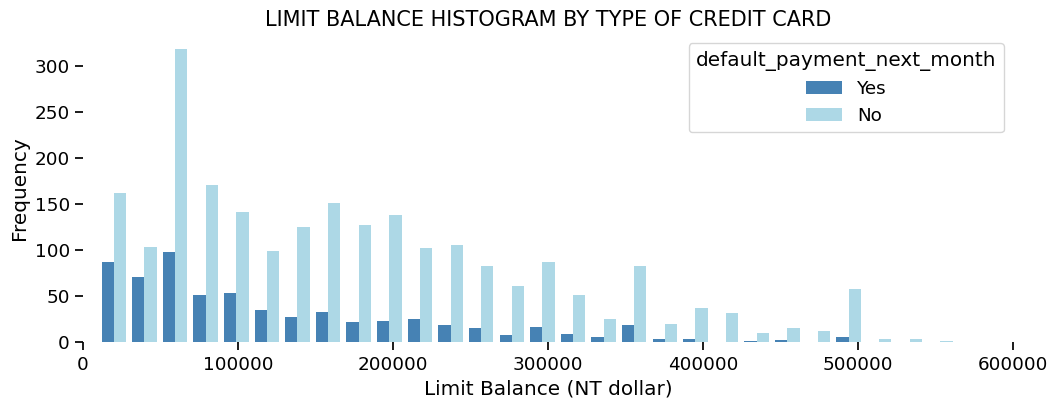

In [11]:
# Menampilkan grafik limit balance
x1 = list(data[data['default_payment_next_month'] == 1]['limit_balance'])
x2 = list(data[data['default_payment_next_month'] == 0]['limit_balance'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'default_payment_next_month', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

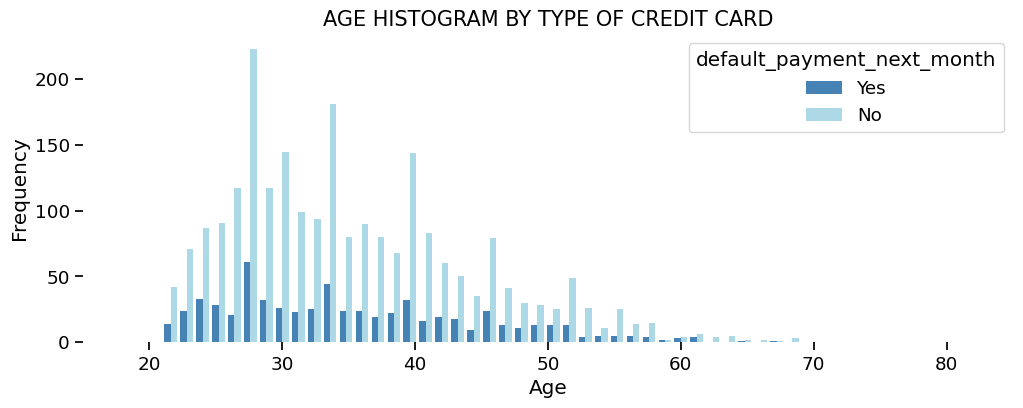

In [12]:
# Menampilkan grafik umur
x1 = list(data[data['default_payment_next_month'] == 1]['age'])
x2 = list(data[data['default_payment_next_month'] == 0]['age'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, density=False, color=['steelblue', 'lightblue'])
plt.xlim([15,85])
plt.legend(['Yes', 'No'], title = 'default_payment_next_month', loc='upper right', facecolor='white')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('AGE HISTOGRAM BY TYPE OF CREDIT CARD', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)

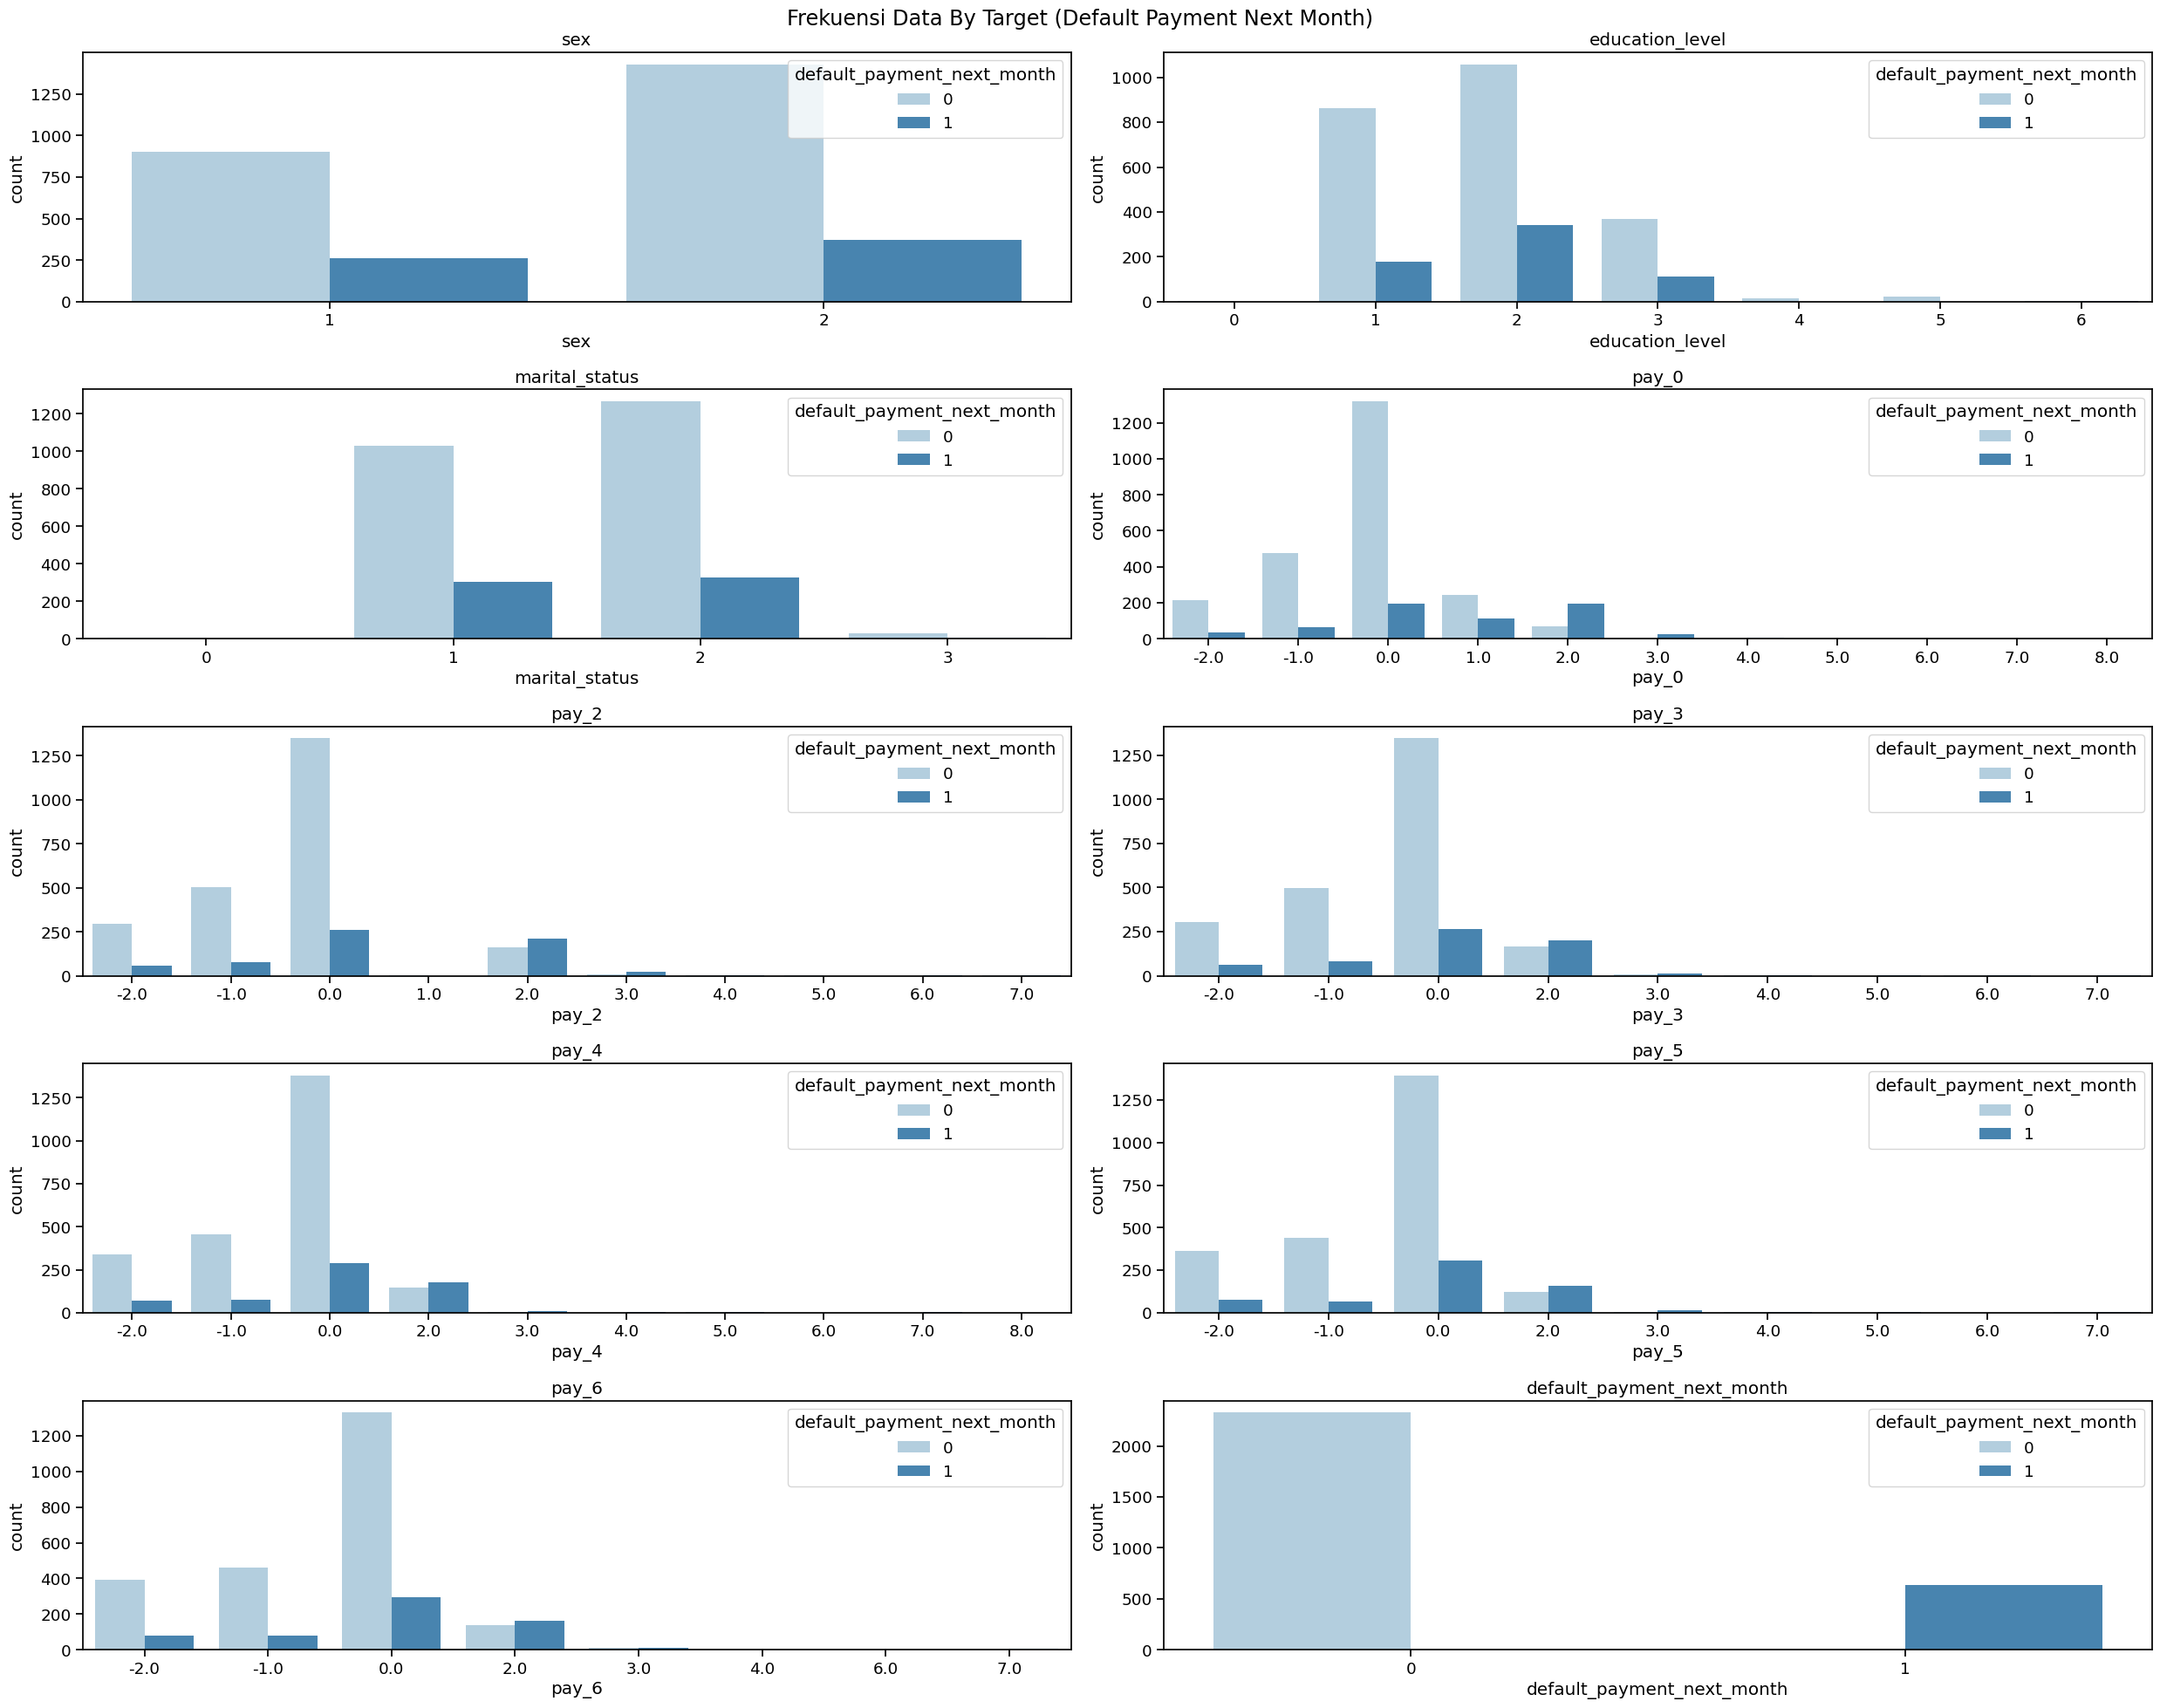

In [13]:
# Daftar nama kolom kategorikal
cat_cols = ['sex', 'education_level', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']

# Membuat subplot
f, axes = plt.subplots(5, 2, figsize=(25, 20), facecolor='white')
f.suptitle('Frekuensi Data By Target (Default Payment Next Month)')

# Membuat looping
for i, column in enumerate(cat_cols):
    row = i // 2  # Nomor baris subplot
    col = i % 2   # Nomor kolom subplot
    
    # Menampilkan countplot
    ax = sns.countplot(x=column, hue='default_payment_next_month', data=data[cat_cols], palette='Blues', ax=axes[row, col])
    ax.set_title(column)
    ax.legend(title='default_payment_next_month', loc='upper right')

# Menampilkan plot
plt.tight_layout()
plt.show()


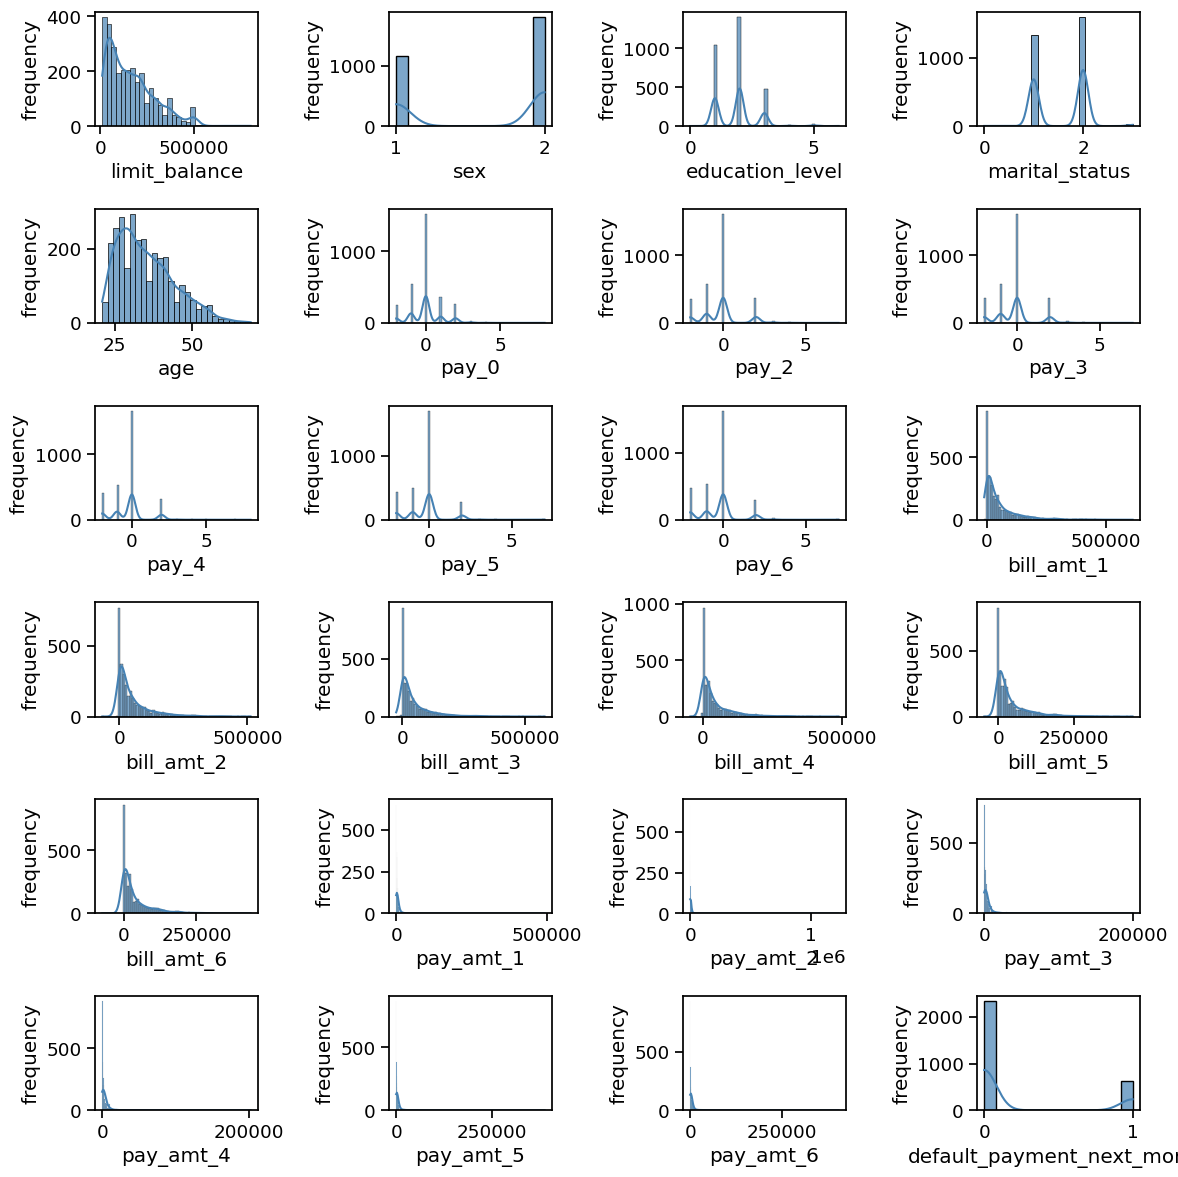

In [14]:
# Membuat subplot dengan ukuran 6 x 4
fig, axes = plt.subplots(6, 4, figsize=(12, 12))

# Mendapatkan daftar kolom dalam DataFrame
columns = data.columns

# Melakukan looping untuk membuat histogram pada setiap kolom
for i, ax in enumerate(axes.flatten()):
    if i < len(columns):
        # Membuat histogram
        sns.histplot(data=data, x=columns[i], kde=True, color='steelblue', alpha=0.7, ax=ax)
        ax.set_xlabel(columns[i])
        ax.set_ylabel('frequency')

# Menyusun tata letak subplot
plt.tight_layout()

# Menampilkan plot
plt.show()


In [15]:
# Membuat variable baru
data_pay = data.loc[:,['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']]
data_pay_amt = data.loc[:,['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']]
data_bill_amt = data.loc[:,['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'default_payment_next_month']]
other_data = data.loc[:,['age', 'sex', 'education_level', 'marital_status', 'default_payment_next_month']]

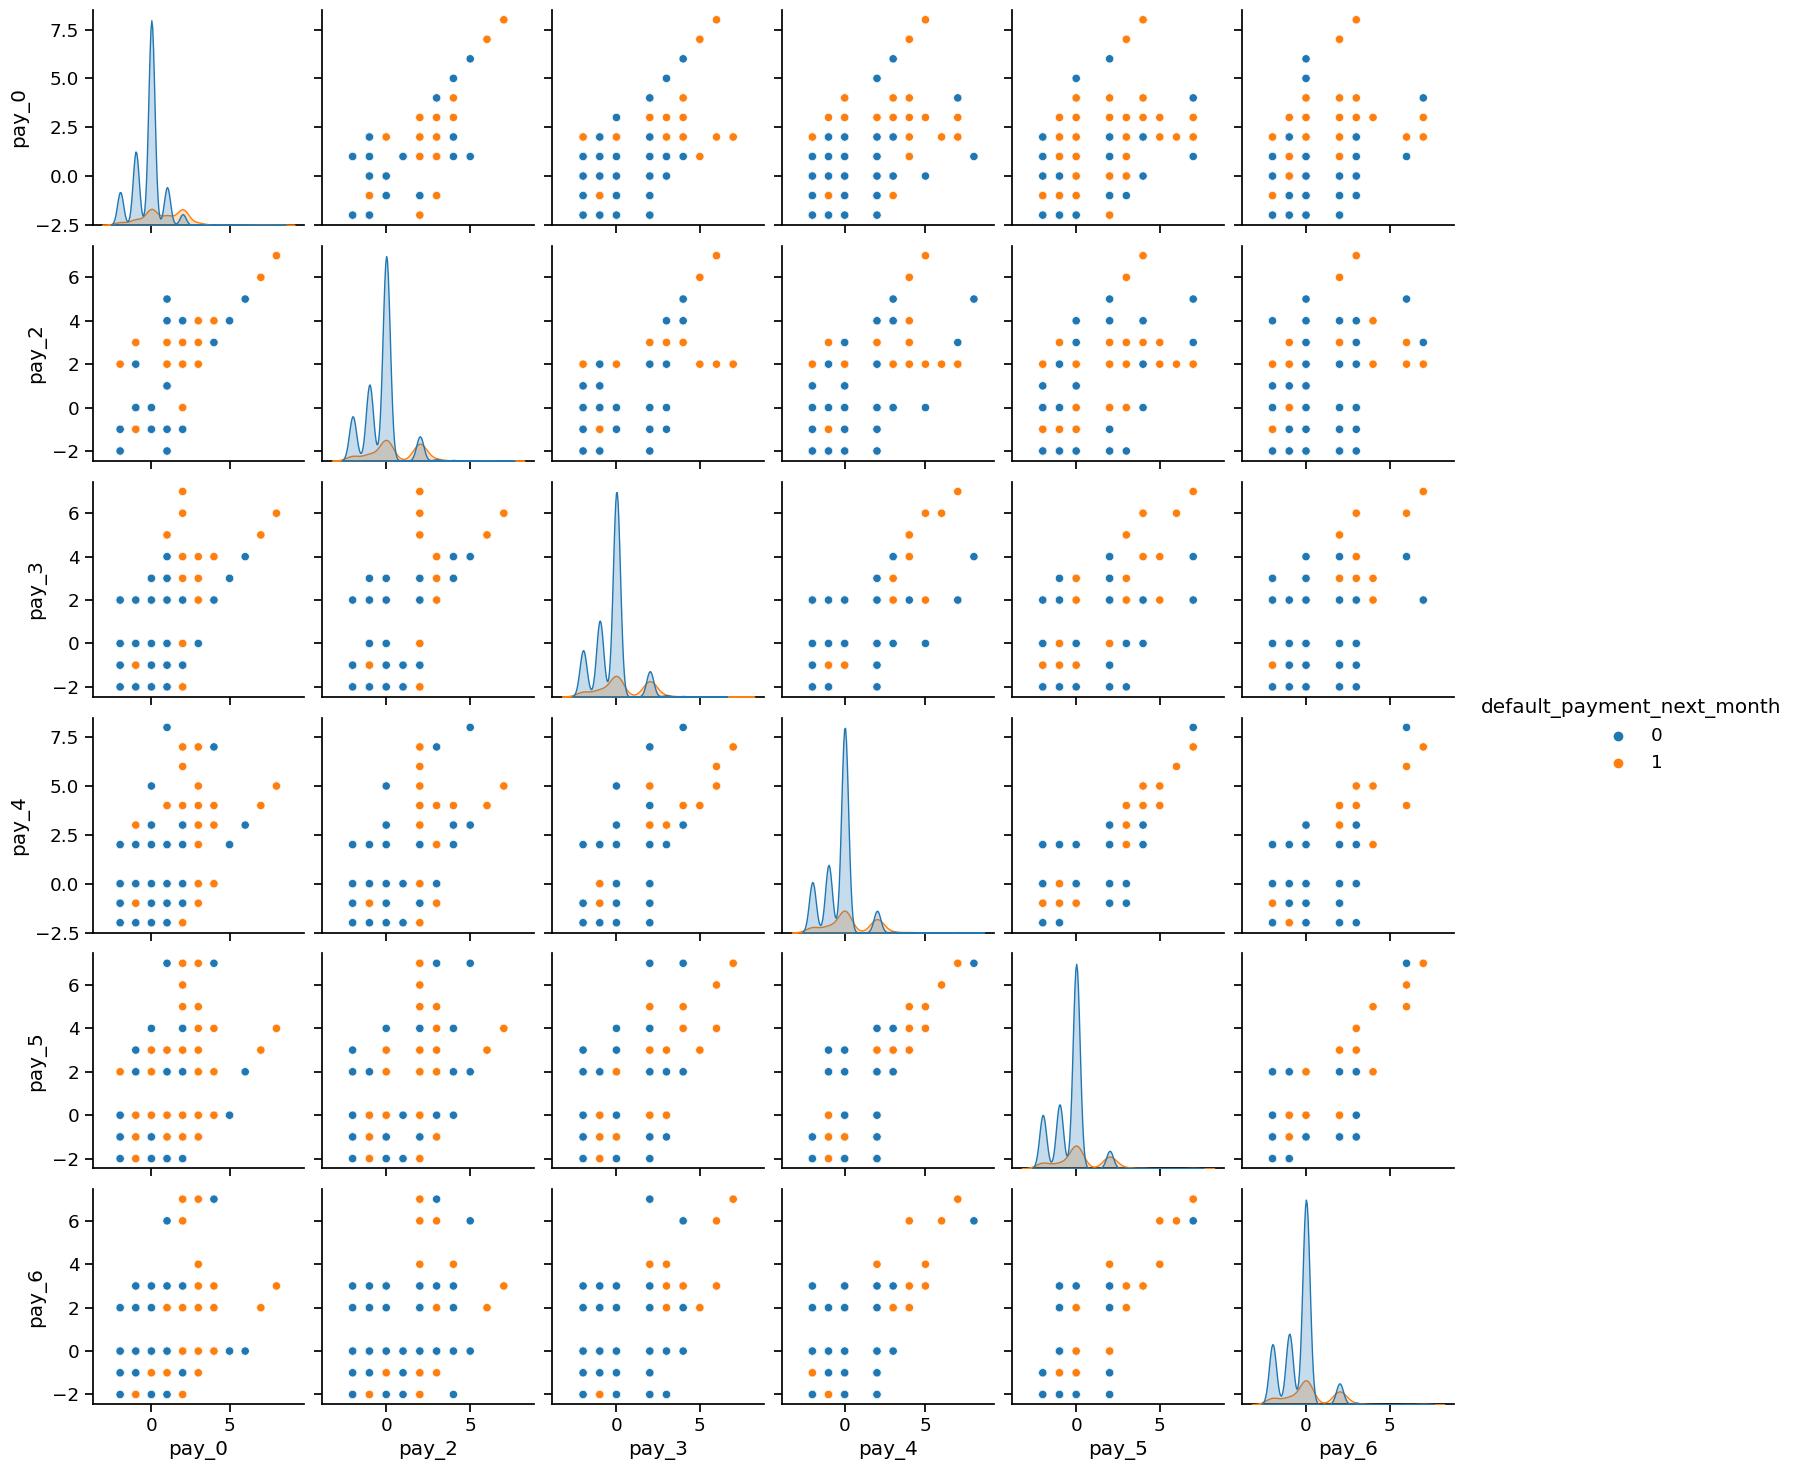

In [16]:
# Menampilkan scatterplot
sns.pairplot(data = data_pay, hue = 'default_payment_next_month')

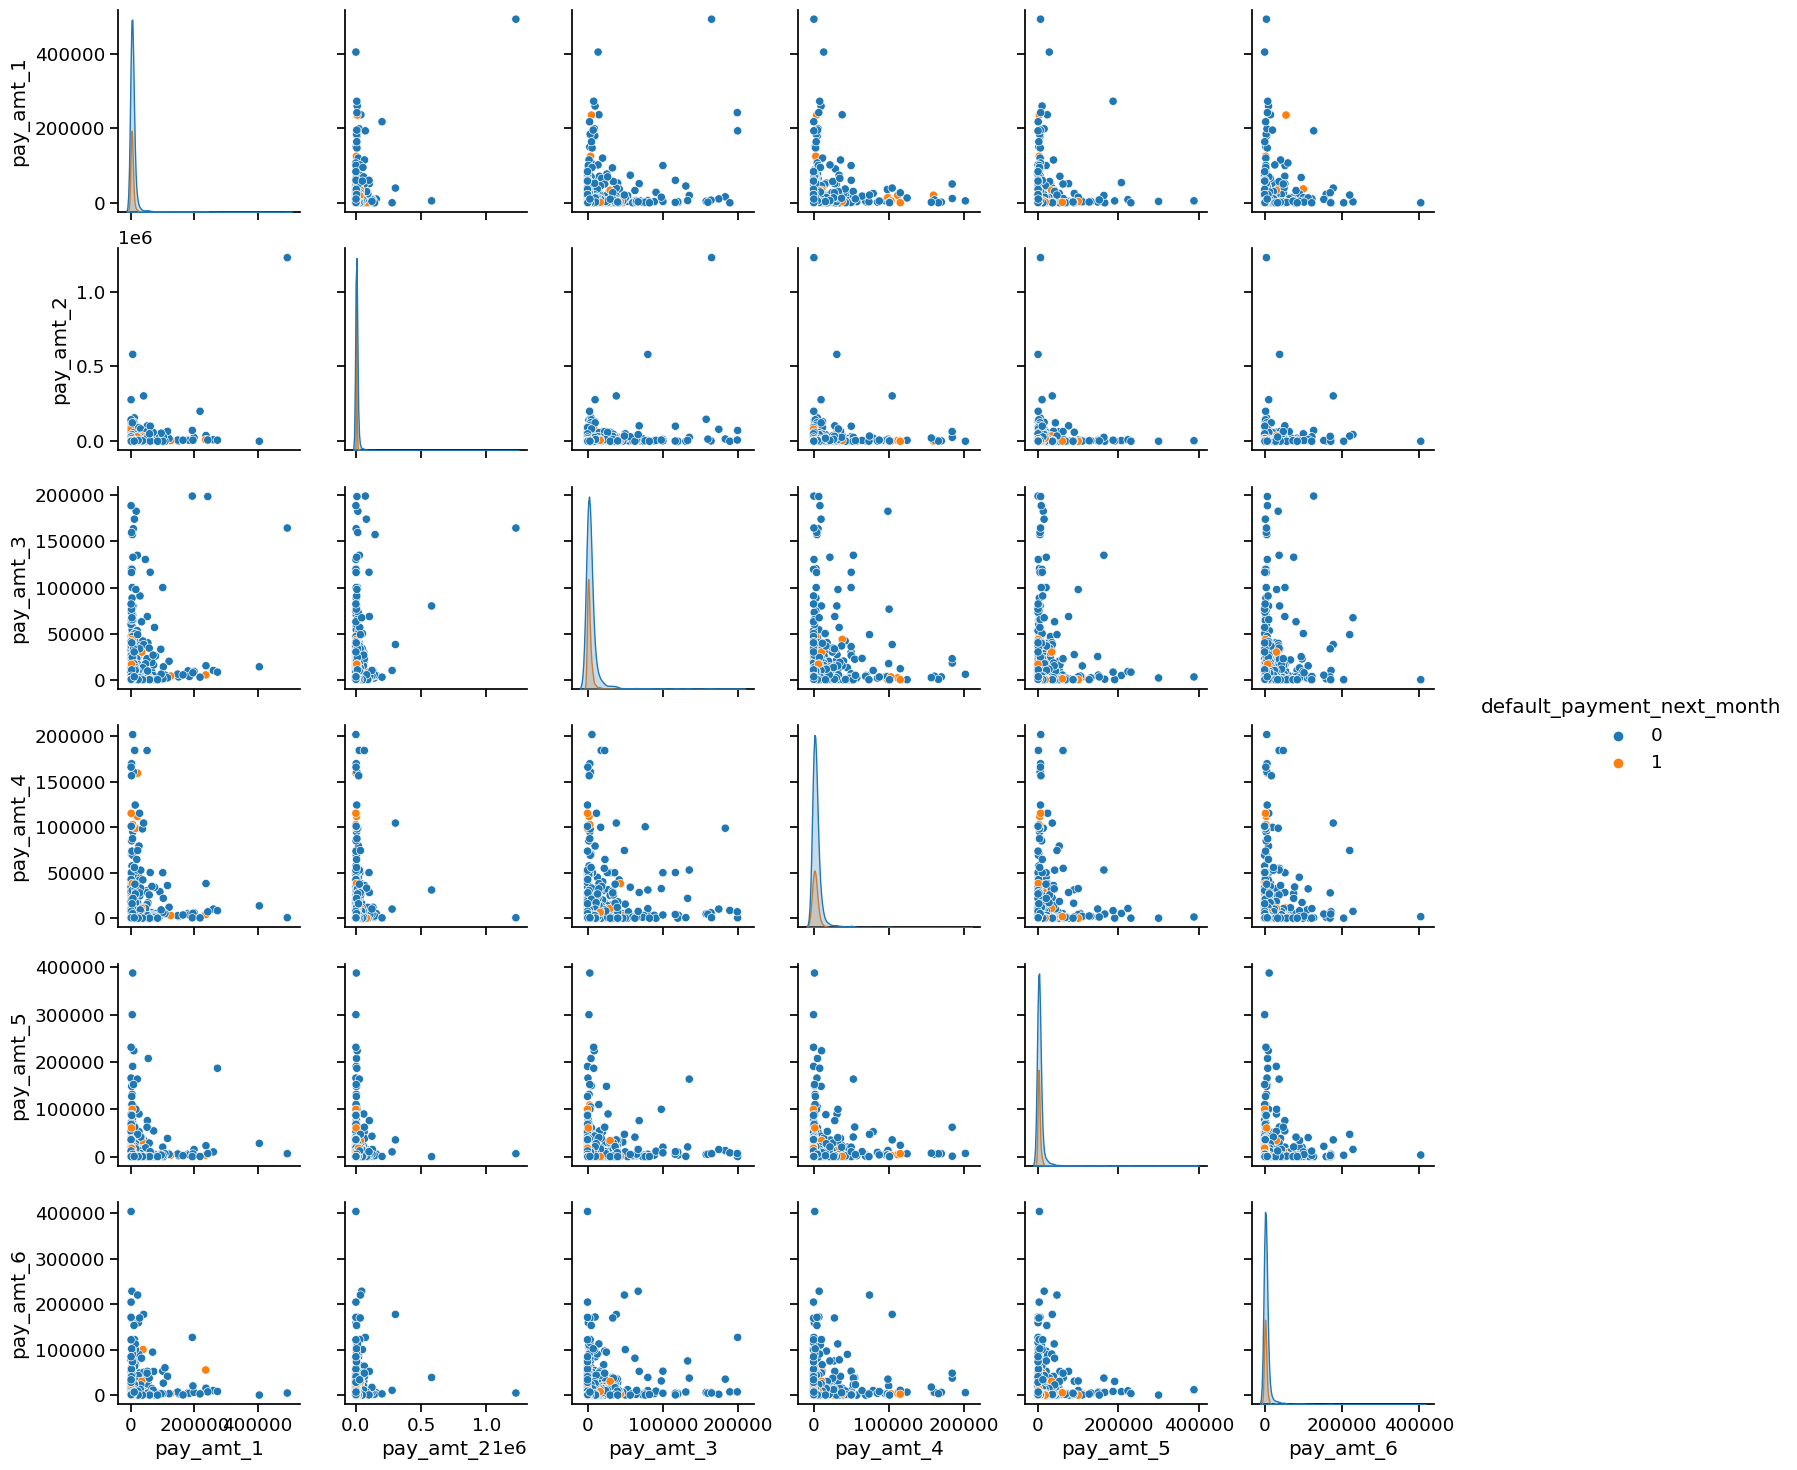

In [17]:
# Menampilkan scatterplot
sns.pairplot(data = data_pay_amt, hue = 'default_payment_next_month')

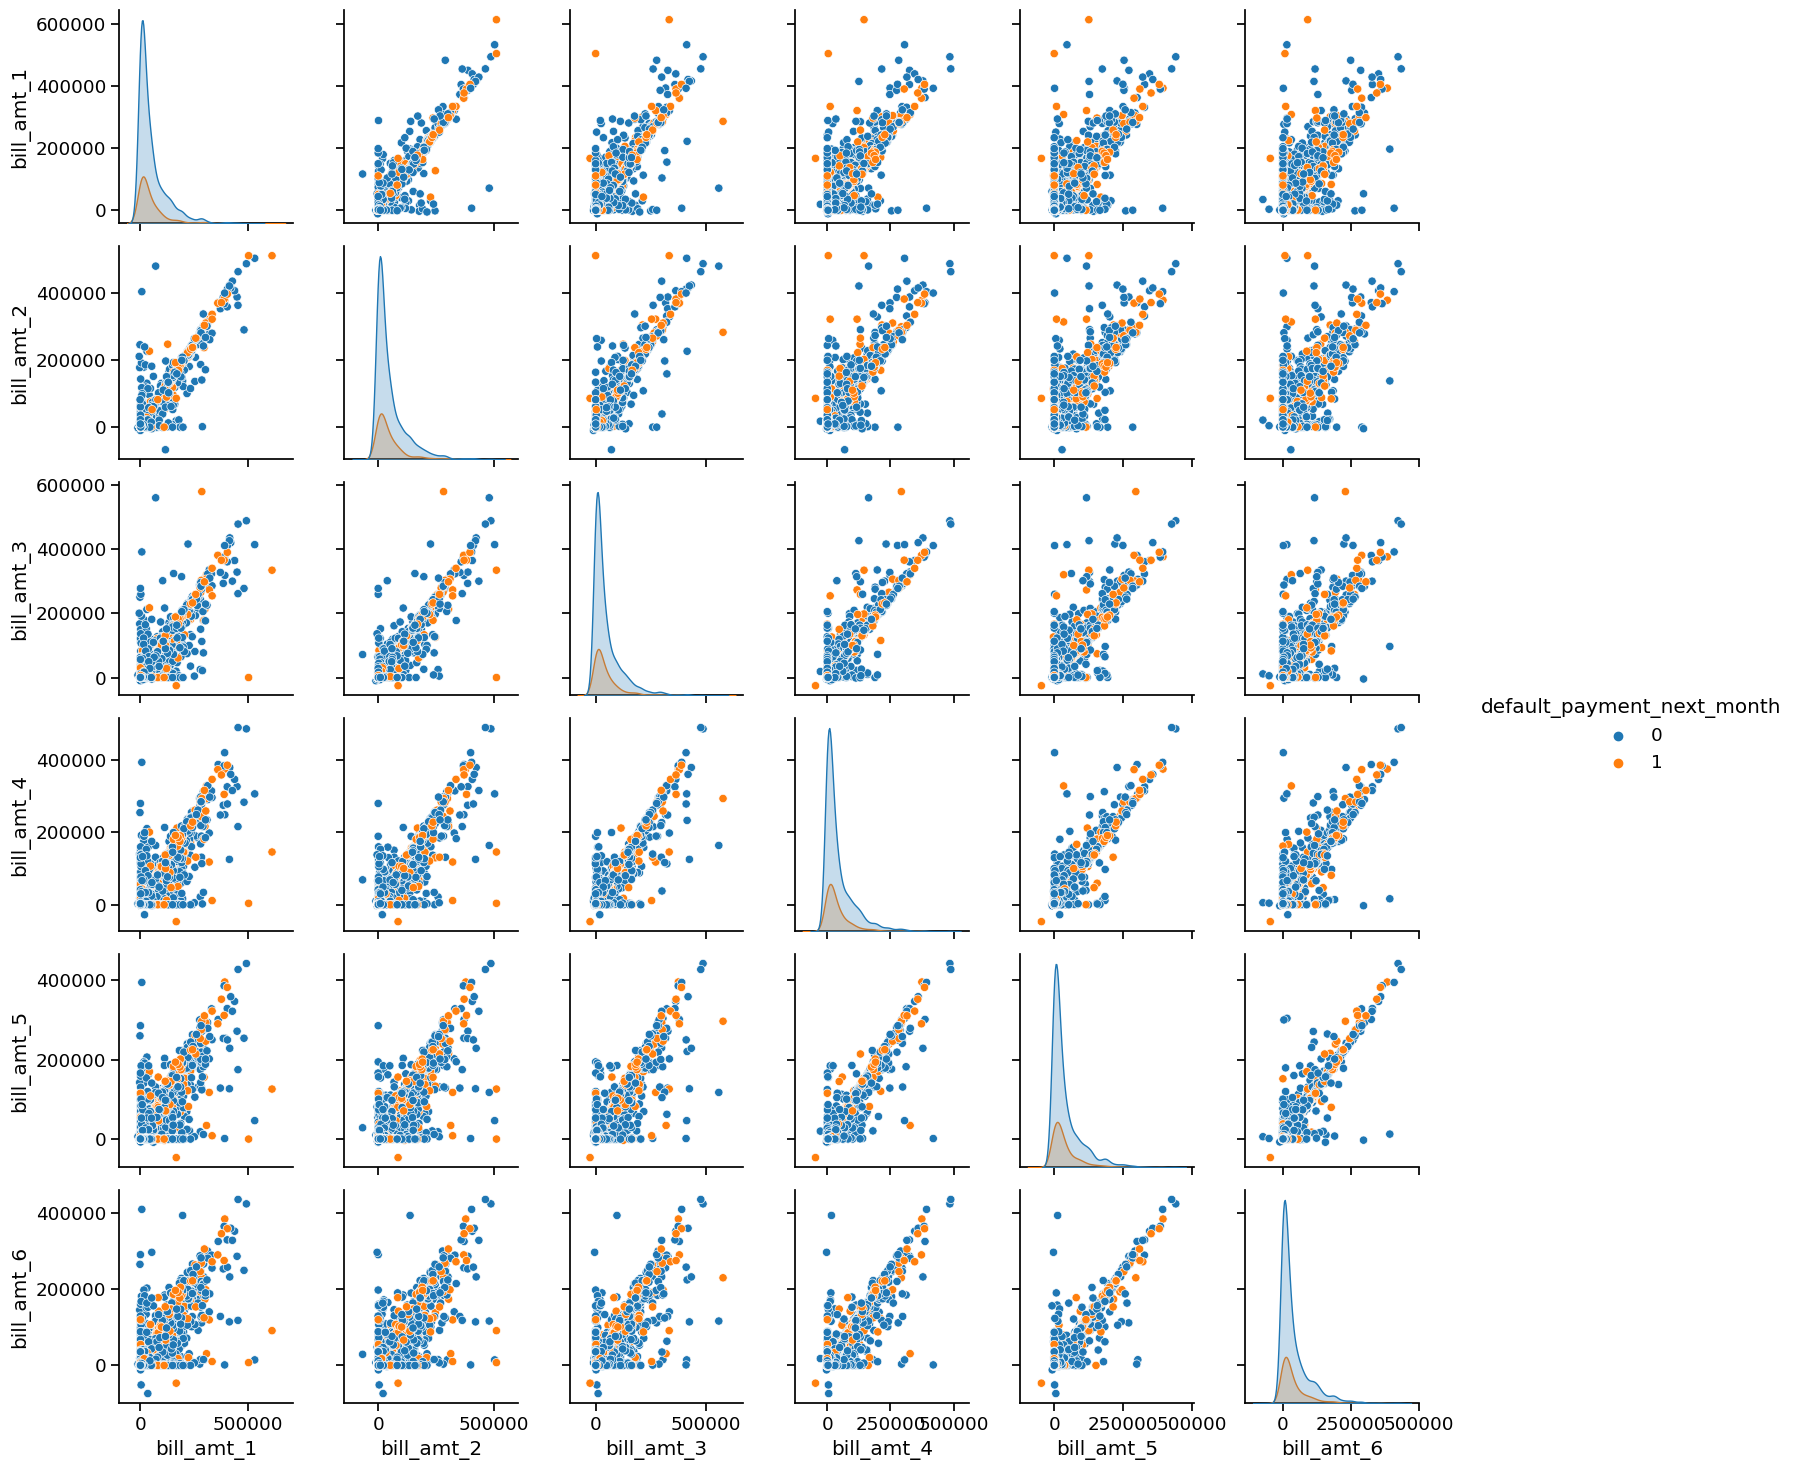

In [18]:
# Menampilkan scatterplot
sns.pairplot(data = data_bill_amt, hue = 'default_payment_next_month')

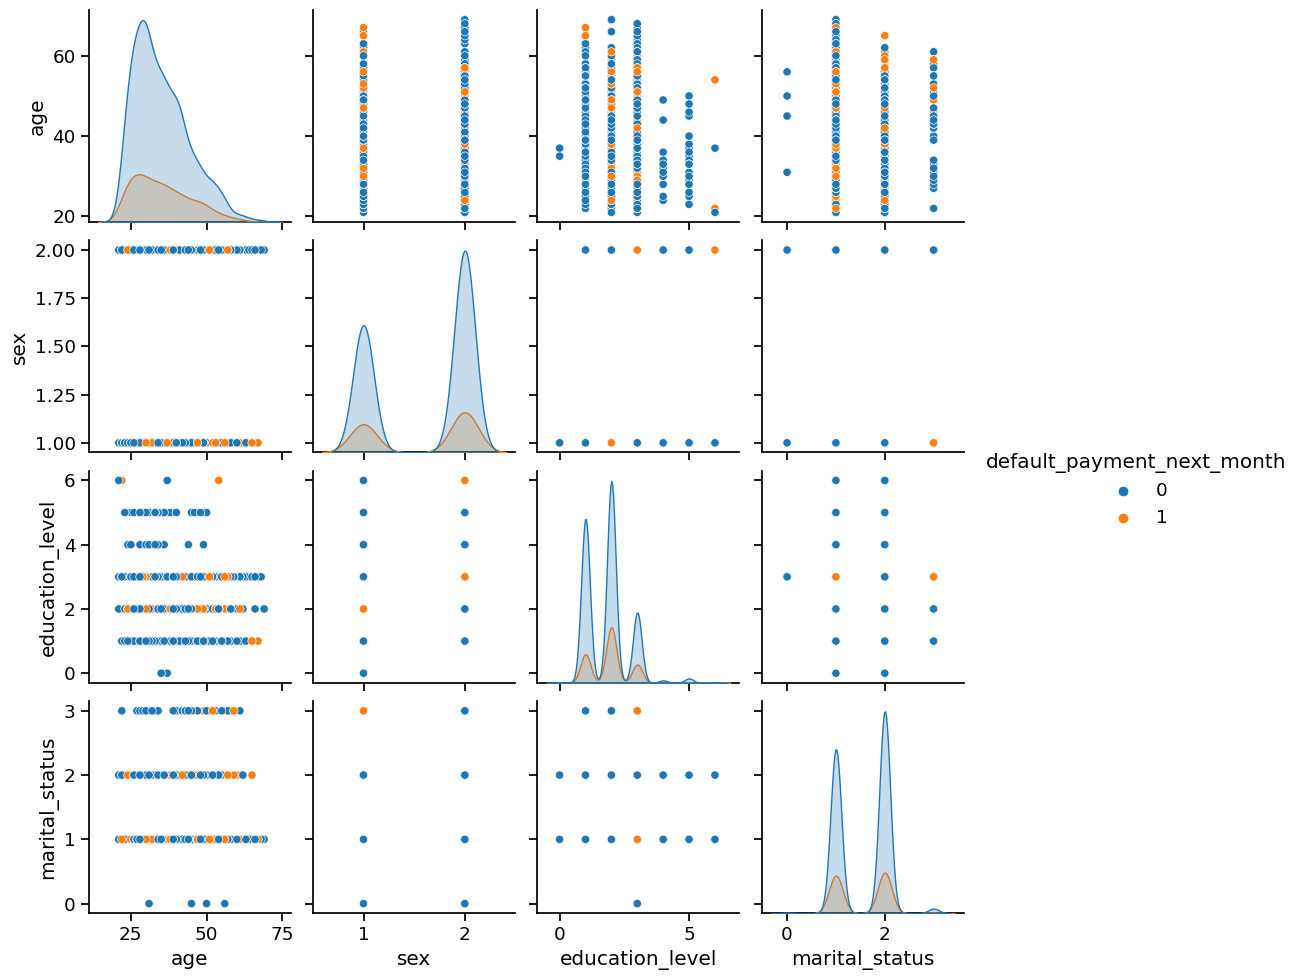

In [19]:
# Menampilkan scatterplot
sns.pairplot(data = other_data, hue = 'default_payment_next_month')

Statement :

- Sebanyak 2900 kartu kredit dengan rata rata limit balance 163,356 NT dollars standard deviasi 125,049 dengan rentang limit balance dari 10,000 sampai 800,000

- Kebanyakan pemiliki kartu kredit memiliki umur rata-rata 35 tahun, seorang perempuan dengan level edukasi universitas dan lulus SMA, berstatus menikah dan belum menikah

- Hampir seluruh grafik histogram menunjukan distibusi data yang tidak normal

- Dari grafik scatterplot dapat diketahui bahwa data_pay dan data_bill_amt memiliki korelasi sedangkan pada other_data dan pay_amt tidak memiliki korelasi

# **VI. Feature Engineering**

## Split Between X (Feature) dan Y (Target)

Membagi data kedalam variable `x` dan variable `y`

In [20]:
# Splitting between x dan y
X = data.drop(['default_payment_next_month'], axis = 1)
y = data['default_payment_next_month']

X.shape # Kolom default_payment_next_month sudah tidak termasuk kedalam data

(2964, 23)

## Split Between Train-Set dan Test-Set

Membagi variable `x` dan `y` kedalan `train`-set dan `test`-set

In [21]:
# Splitting data kepada data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7,
                                                    stratify = y)

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)
X_train

Train Size : (2371, 23)
Test Size : (593, 23)


limit_balance  sex  education_level  marital_status   age  pay_0  pay_2  \
859        350000.0    2                2               1  41.0    0.0    0.0   
1900       200000.0    1                2               2  27.0    1.0    2.0   
1683       150000.0    2                3               1  26.0    0.0    0.0   
2277        50000.0    2                1               2  25.0   -1.0   -1.0   
2674        40000.0    2                3               1  39.0   -2.0   -2.0   
...             ...  ...              ...             ...   ...    ...    ...   
2137       390000.0    2                1               1  53.0   -1.0   -1.0   
877        140000.0    2                2               2  32.0    0.0    0.0   
426         50000.0    1                2               1  25.0    0.0    0.0   
1864       140000.0    1                2               1  38.0    2.0    2.0   
863         50000.0    2                2               1  40.0    0.0    0.0   

      pay_3  pay_4  pay_5  pay_6  bill_amt_1  bill_amt_2  bill_amt_3  \
859     0.0    0.0    0.0    0.0     85339.0     84393.0     86793.0   
1900    2.0    2.0    2.0    2.0    112050.0    115353.0    112099.0   
1683    0.0    0.0    0.0   -2.0     92802.0     91166.0     99655.0   
2277   -1.0   -1.0   -1.0   -1.0      3195.0      3548.0     23231.0   
2674   -2.0   -2.0   -2.0   -2.0      7955.0      5392.0      5151.0   
...     ...    ...    ...    ...         ...         ...         ...   
2137   -2.0   -2.0   -1.0    0.0       611.0         0.0         0.0   
877     0.0    0.0    0.0    0.0    121508.0     99470.0     83330.0   
426     0.0    0.0    0.0    0.0     27699.0     28513.0     29341.0   
1864    2.0    2.0    2.0    2.0    131877.0    135309.0    131671.0   
863     0.0    0.0    0.0    0.0     31934.0     32711.0     34061.0   

      bill_amt_4  bill_amt_5  bill_amt_6  pay_amt_1  pay_amt_2  pay_amt_3  \
859      84406.0     73976.0     75497.0     5000.0     5016.0     5000.0   
1900    118764.0    120780.0    123710.0     6501.0        0.0    10000.0   
1683    100000.0         0.0         0.0     7500.0    10000.0     2000.0   
2277      2881.0      3048.0      2739.0     3557.0    23501.0     2889.0   
2674      3434.0      1143.0         0.0     5392.0     5151.0     3434.0   
...          ...         ...         ...        ...        ...        ...   
2137         0.0       343.0      1343.0        0.0        0.0        0.0   
877      57609.0     59526.0     31515.0     5000.0     4000.0     3000.0   
426      29928.0     29533.0     28538.0     1565.0     1393.0      980.0   
1864    138771.0    141146.0    127184.0     7000.0        0.0    10800.0   
863      32672.0     32479.0     33431.0     2000.0     3000.0     3000.0   

      pay_amt_4  pay_amt_5  pay_amt_6  
859      3000.0     3000.0     4000.0  
1900     4001.0     5000.0        0.0  
1683        0.0        0.0        0.0  
2277     3057.0     2746.0    47651.0  
2674     1143.0        0.0        0.0  
...         ...        ...        ...  
2137      343.0     1000.0     1076.0  
877      3000.0     2500.0        0.0  
426       994.0     1024.0      886.0  
1864     4800.0        0.0     5000.0  
863      3000.0     2000.0     1000.0  

[2371 rows x 23 columns]

## Handling Cardinality

Saya lakukan handling cardinality pada kolom educational_level, marital_status, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6

In [22]:
# Handling cardinality
X_train = X_train.replace({'education_level' : {1 : 1, 2 : 2, 3 : 3, 4 : 4, 5 : 4, 6 : 4, 0 :4}, 
                           'marital_status' : {1 : 1, 2 : 2, 3 : 3, 0 : 3},
                           'pay_0' : {-2 : 0, -1 : 0},
                           'pay_2' : {-2 : 0, -1 : 0},
                           'pay_3' : {-2 : 0, -1 : 0},
                           'pay_4' : {-2 : 0, -1 : 0},
                           'pay_5' : {-2 : 0, -1 : 0},
                           'pay_6' : {-2 : 0, -1 : 0}})

X_test = X_test.replace({'education_level' : {1 : 1, 2 : 2, 3 : 3, 4 : 4, 5 : 4, 6 : 4, 0 :4}, 
                           'marital_status' : {1 : 1, 2 : 2, 3 : 3, 0 : 3},
                           'pay_0' : {-2 : 0, -1 : 0},
                           'pay_2' : {-2 : 0, -1 : 0},
                           'pay_3' : {-2 : 0, -1 : 0},
                           'pay_4' : {-2 : 0, -1 : 0},
                           'pay_5' : {-2 : 0, -1 : 0},
                           'pay_6' : {-2 : 0, -1 : 0}})

## Handling Outlier

### Grafik Histogram dan Boxplot

In [23]:
# Membuat Function Untuk Menampilkan Grafik Histogram dan Boxplot
def diagnostic_plots(df, variable1, variable2, variable3, variable4):
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable1], bins=20)
    plt.title('Histogram of ' + variable1)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable1])
    plt.title('Boxplot of ' + variable1)
    
    print('Skewness Value of', variable1,':', df[variable1].skew() )
    
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable2], bins=20)
    plt.title('Histogram of ' + variable2)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable2])
    plt.title('Boxplot of ' + variable2)
    
    print('Skewness Value of', variable2,':', df[variable2].skew() )
    
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable3], bins=20)
    plt.title('Histogram of ' + variable3)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable3])
    plt.title('Boxplot of ' + variable3)

    print('Skewness Value of', variable3,':', df[variable3].skew() )

    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable4], bins=20)
    plt.title('Histogram of ' + variable4)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable4])
    plt.title('Boxplot of ' + variable4)    
    
    print('Skewness Value of', variable4,':', df[variable4].skew() )

    plt.figure(figsize=(18, 4))
    
    plt.show()

In [24]:
# Membuat Function Untuk Menampilkan Grafik Histogram dan Boxplot
def diagnostic_plots_2(df, variable1, variable2):
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable1], bins=20)
    plt.title('Histogram of ' + variable1)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable1])
    plt.title('Boxplot of ' + variable1)
    
    print('Skewness Value of', variable1,':', df[variable1].skew() )
    
    plt.figure(figsize=(18, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable2], bins=20)
    plt.title('Histogram of ' + variable2)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(df[variable2])
    plt.title('Boxplot of ' + variable2)
    
    print('Skewness Value of', variable2,':', df[variable2].skew() )
    
    plt.show()

Skewness Value of limit_balance : 1.023397089105238
Skewness Value of age : 0.7595796862521913
Skewness Value of bill_amt_1 : 2.4016752940951487
Skewness Value of bill_amt_2 : 2.4085230908776376


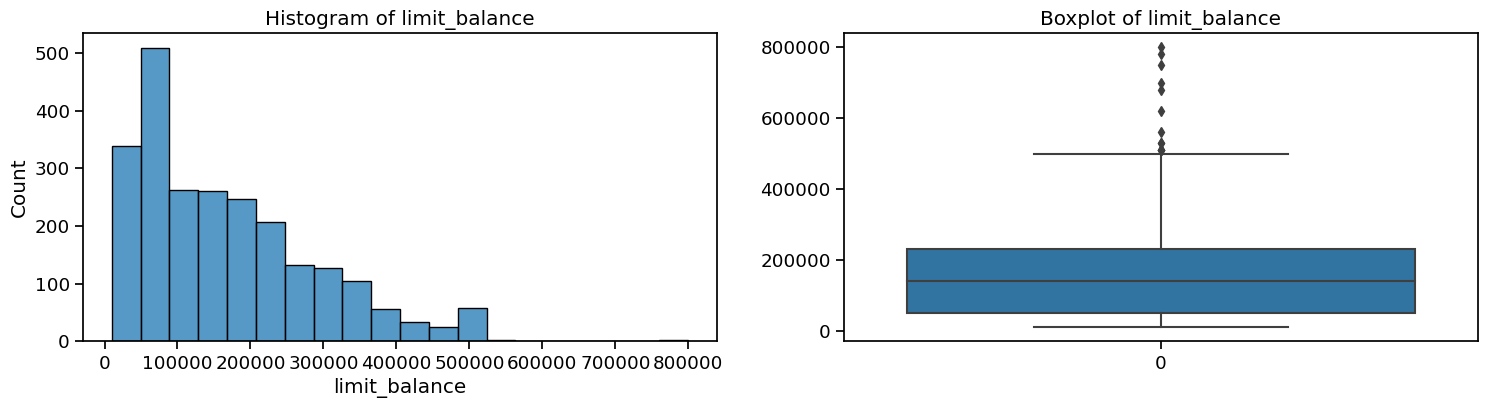

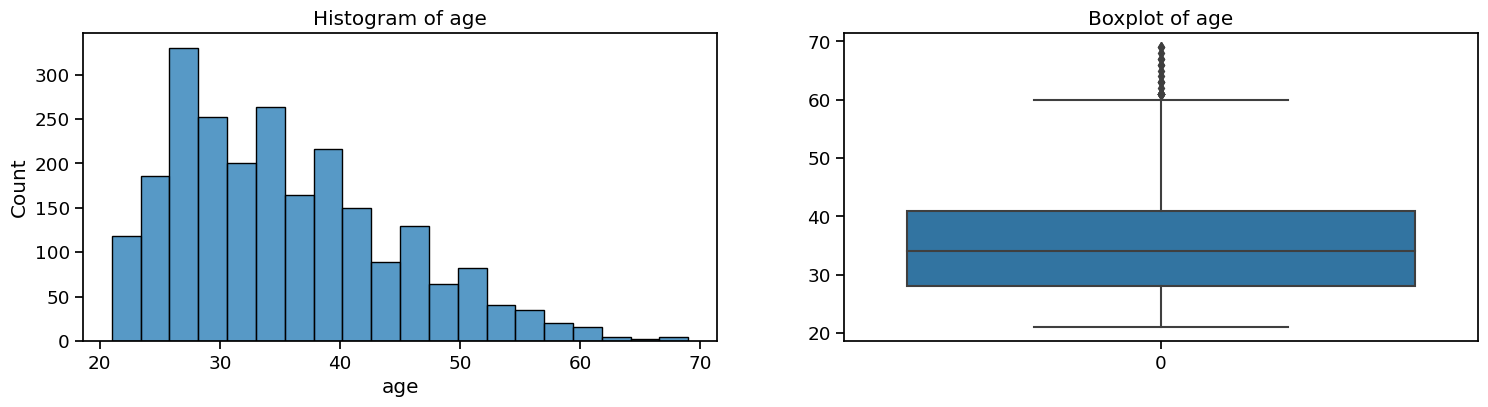

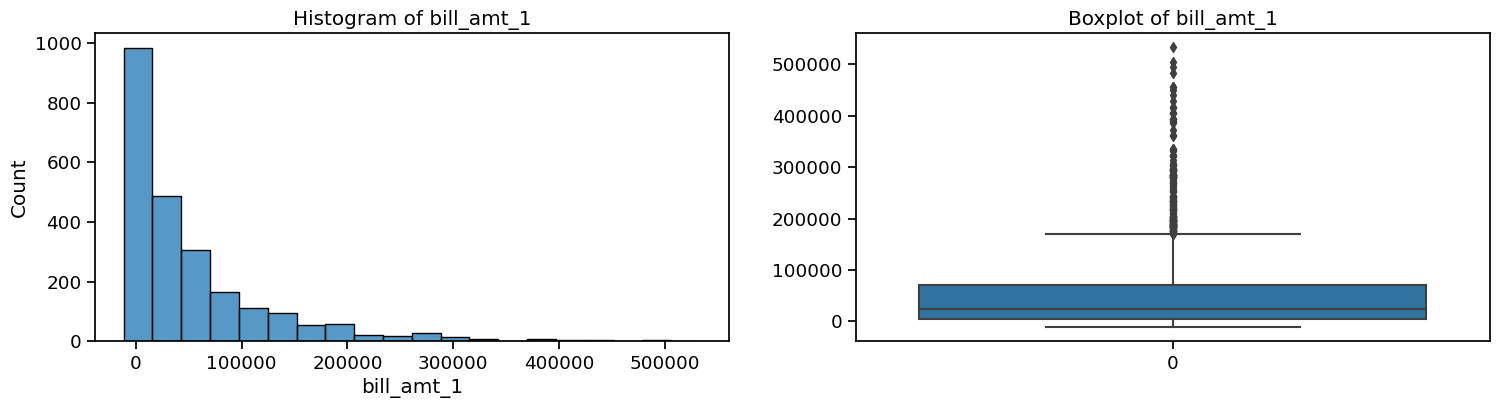

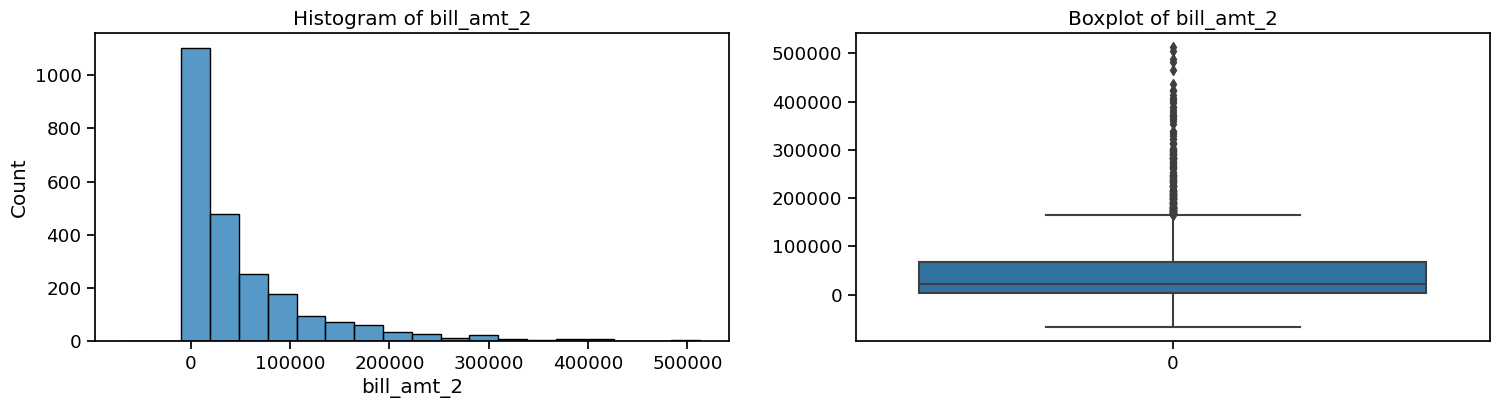

<Figure size 1800x400 with 0 Axes>

In [25]:
# Menampilkan grafik histogram dan boxplot
diagnostic_plots(X_train, 'limit_balance', 'age', 'bill_amt_1', 'bill_amt_2')

Skewness Value of bill_amt_3 : 2.529434061514369
Skewness Value of bill_amt_4 : 2.445509910059575
Skewness Value of bill_amt_5 : 2.4046771290539115
Skewness Value of bill_amt_6 : 2.4163022162329457


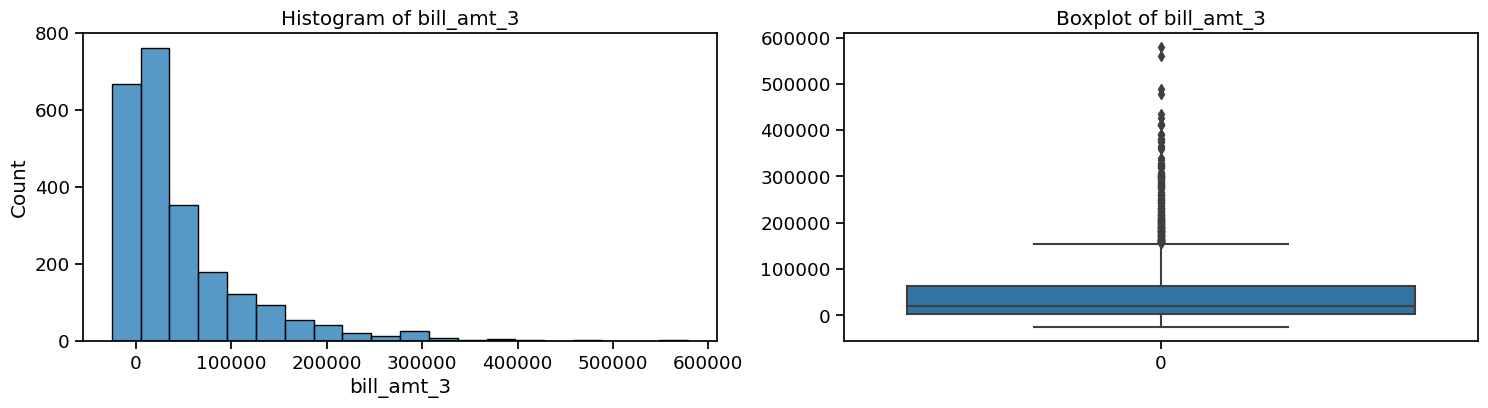

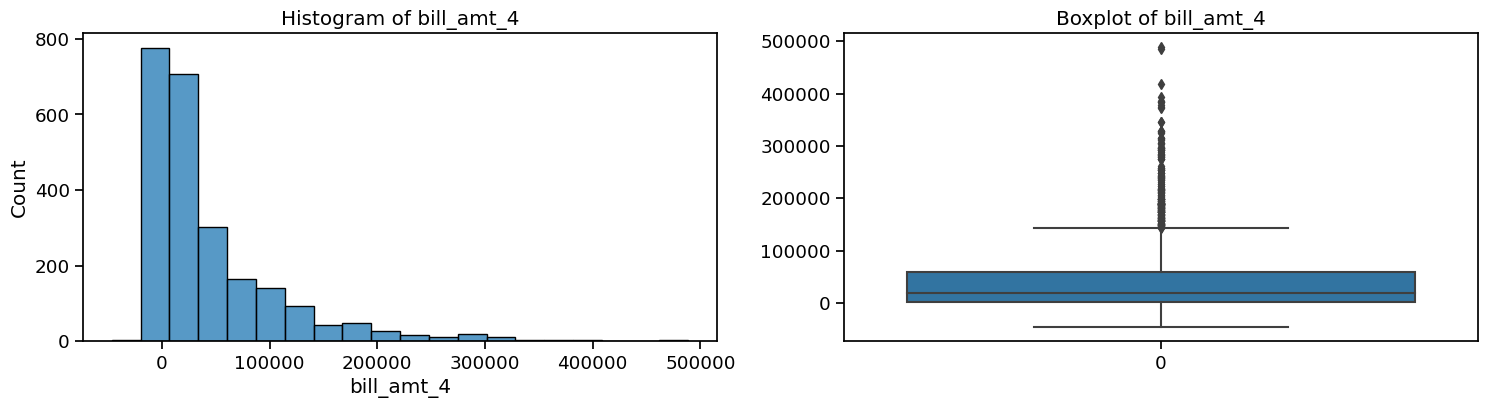

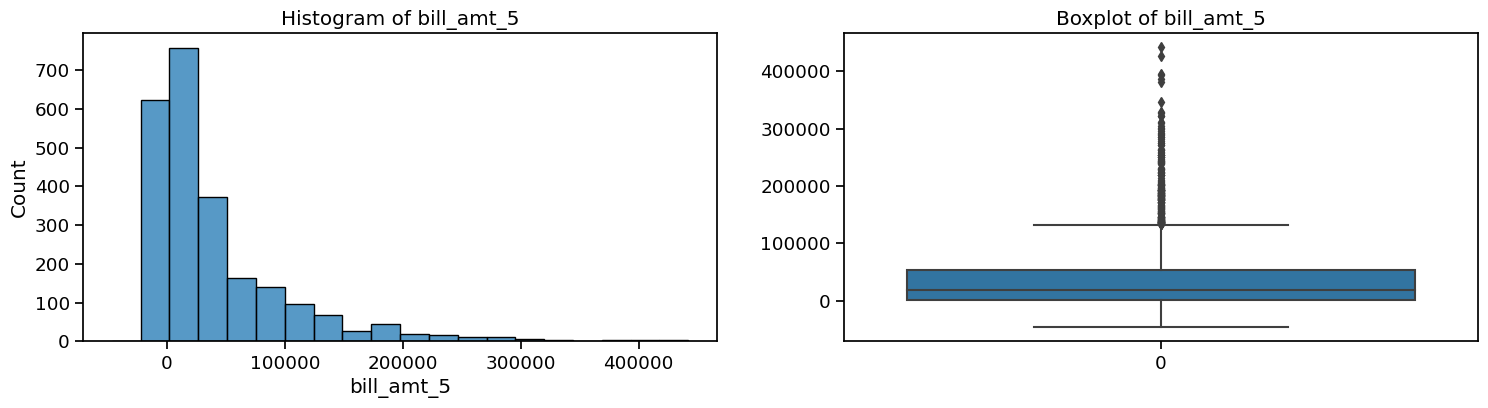

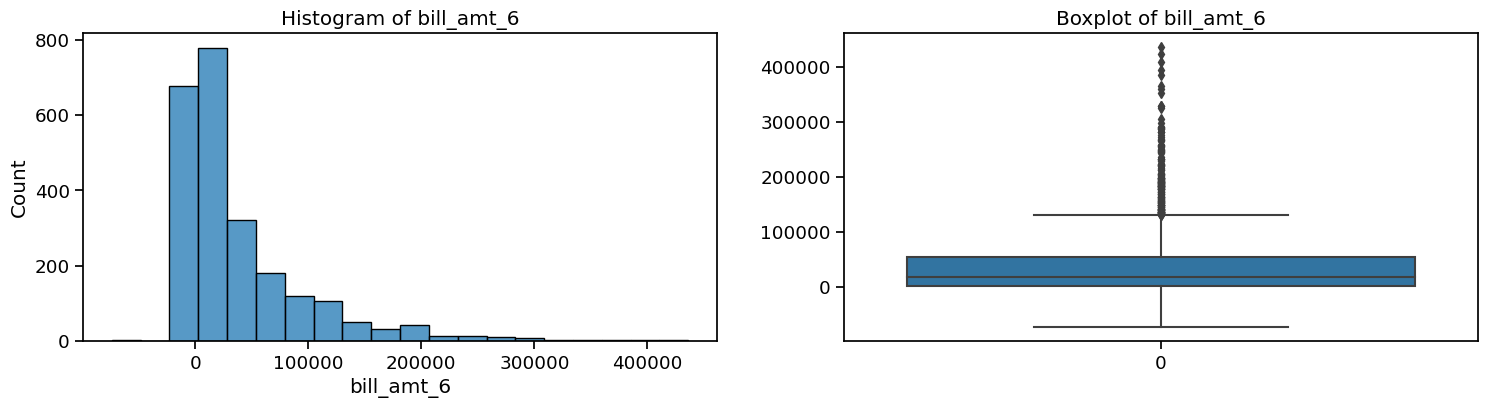

<Figure size 1800x400 with 0 Axes>

In [26]:
# Menampilkan grafik histogram dan boxplot
diagnostic_plots(X_train, 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6')

Skewness Value of pay_amt_1 : 11.786336113498793
Skewness Value of pay_amt_2 : 27.870711897580165
Skewness Value of pay_amt_3 : 8.068778521924918
Skewness Value of pay_amt_4 : 8.29087593578496


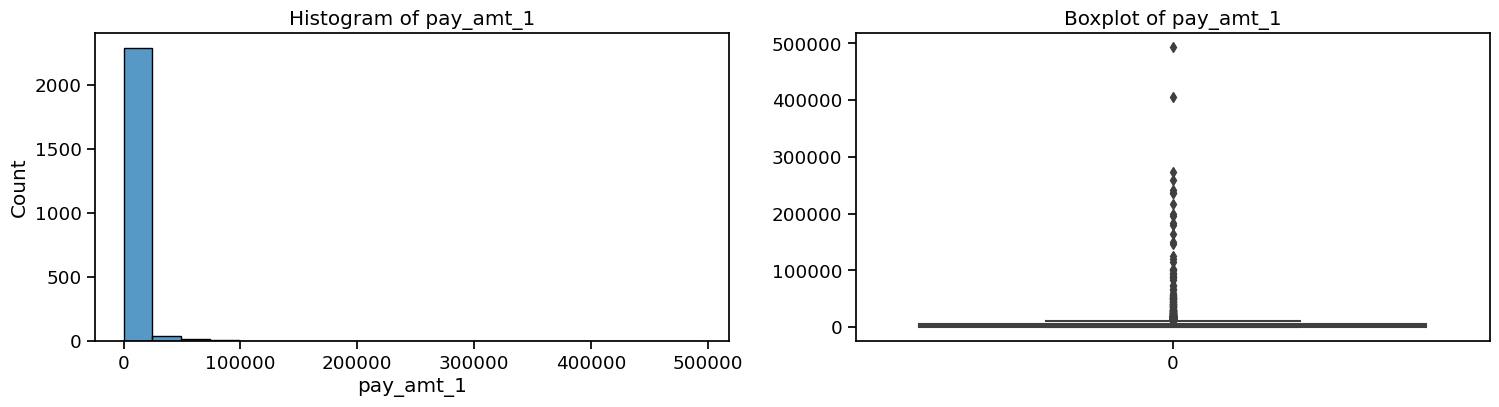

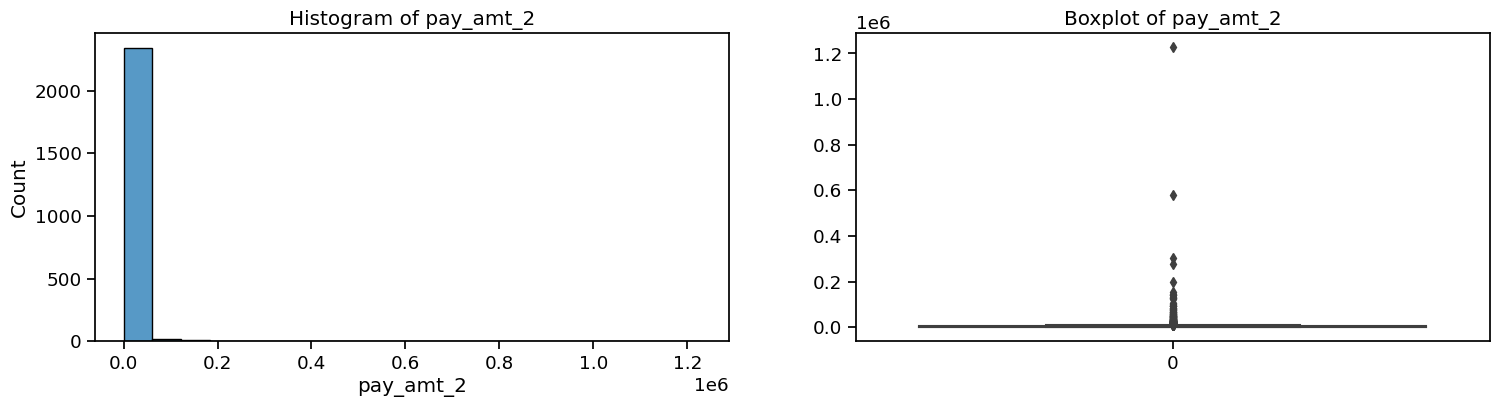

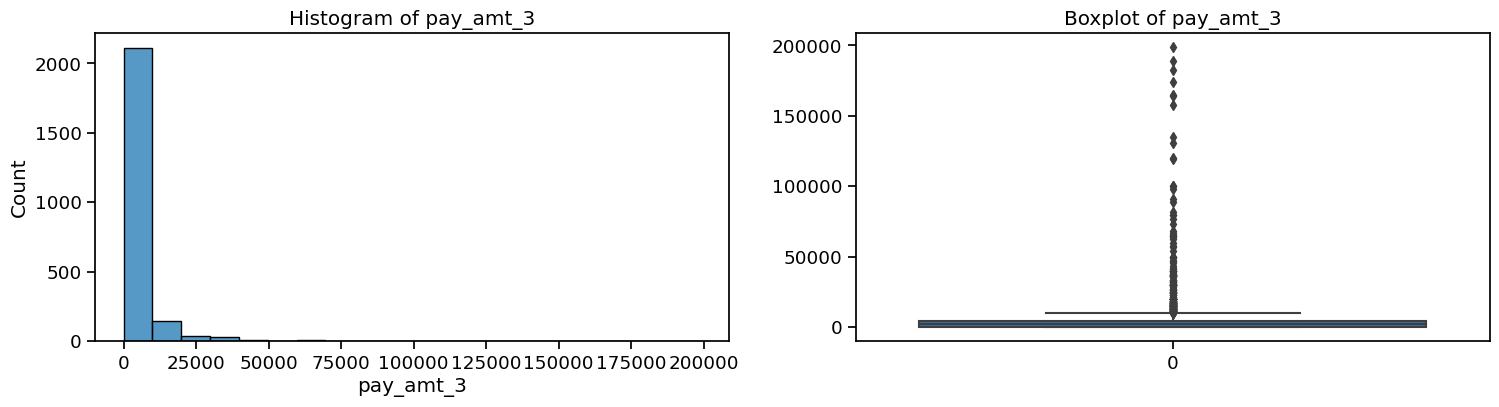

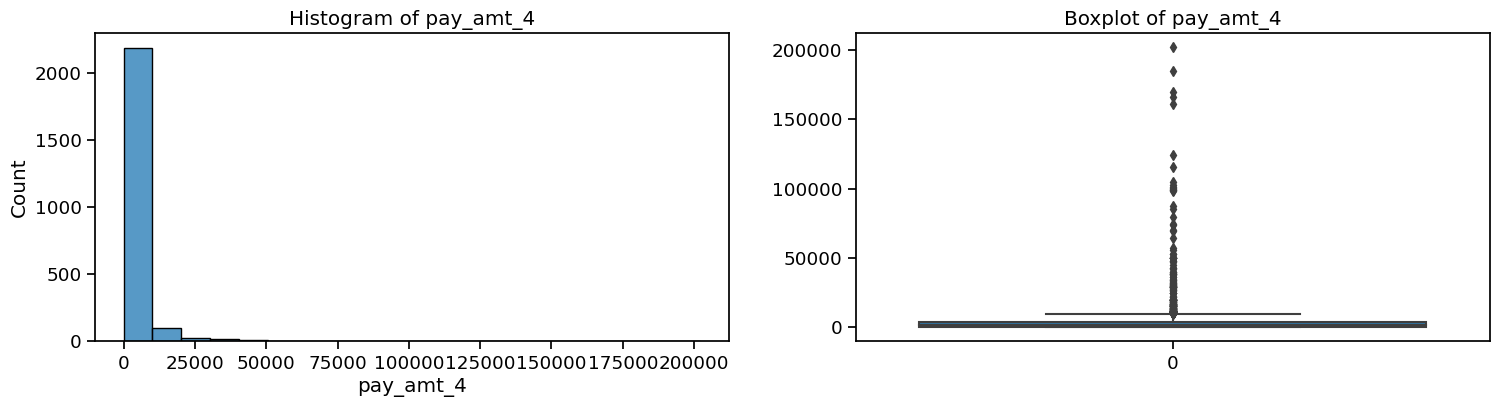

<Figure size 1800x400 with 0 Axes>

In [27]:
# Menampilkan grafik histogram dan boxplot
diagnostic_plots(X_train, 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4')


Skewness Value of pay_amt_5 : 11.321848861880106
Skewness Value of pay_amt_6 : 7.840932447705576
Skewness Value of pay_0 : 3.071053141984681
Skewness Value of pay_2 : 2.79392164640291


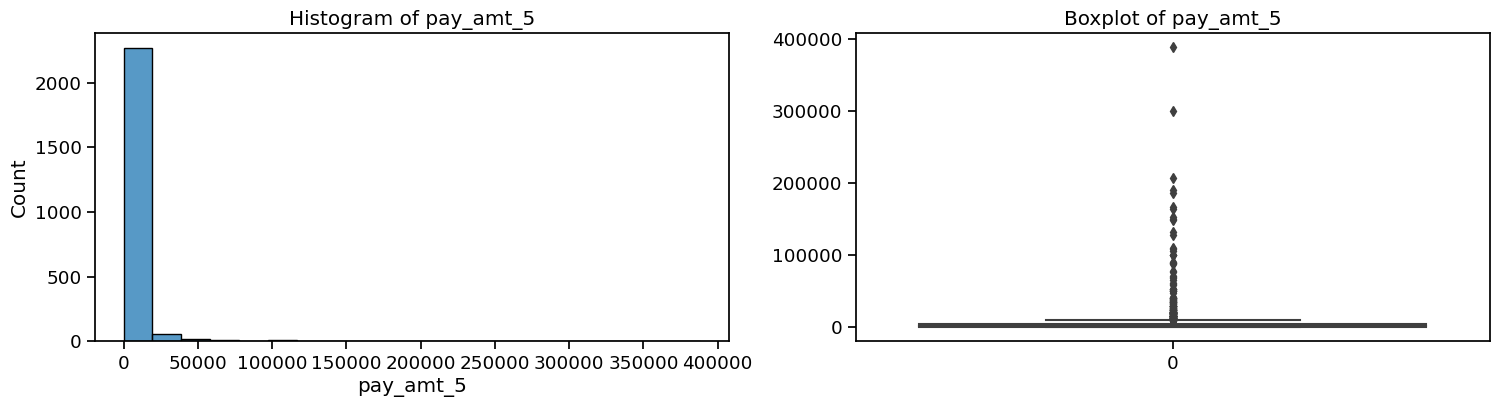

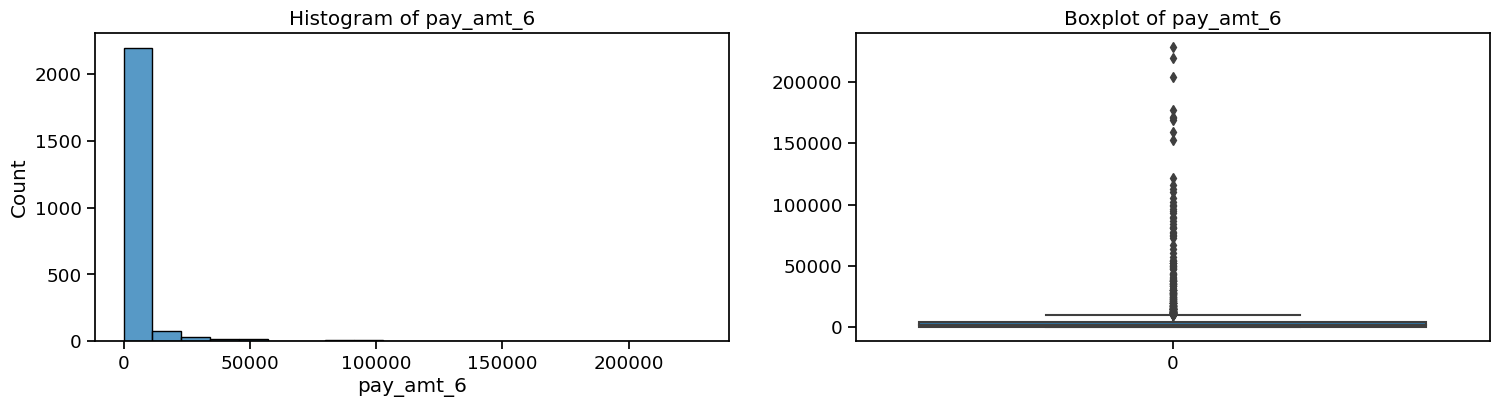

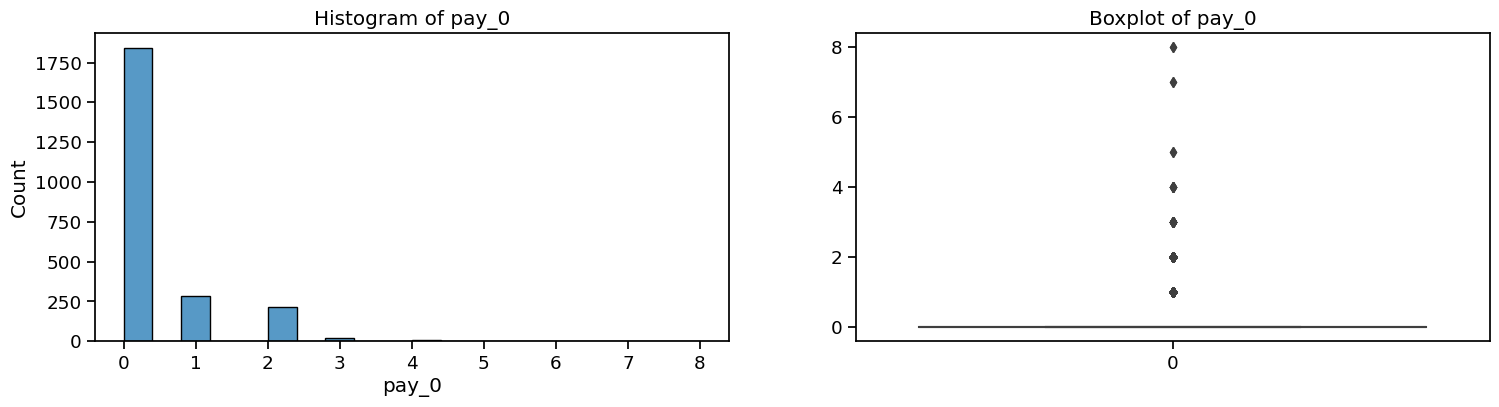

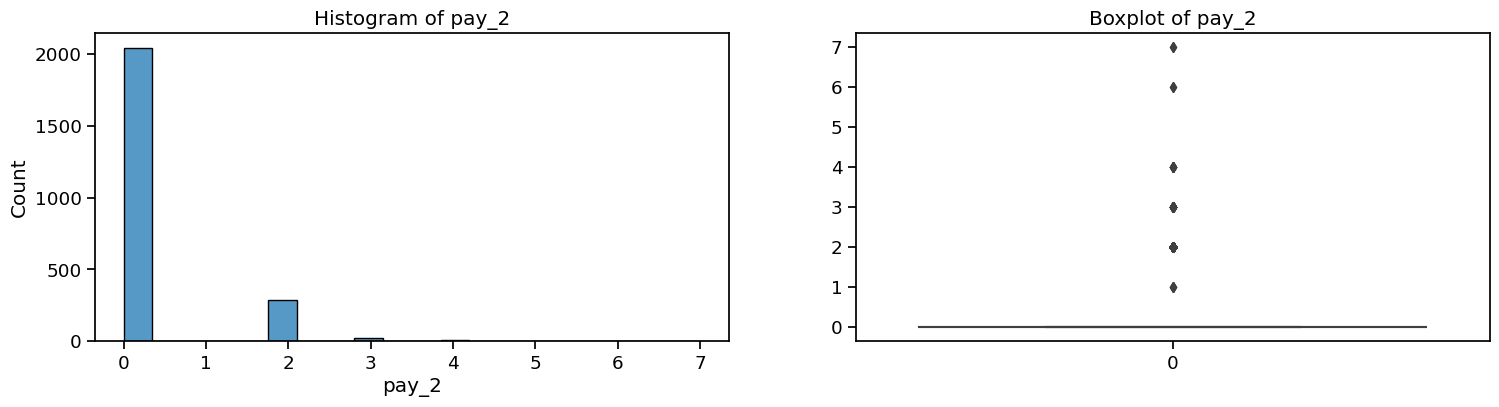

<Figure size 1800x400 with 0 Axes>

In [28]:
# Menampilkan grafik histogram dan boxplot
diagnostic_plots(X_train, 'pay_amt_5', 'pay_amt_6', 'pay_0', 'pay_2')

Skewness Value of pay_3 : 3.0236814782346397
Skewness Value of pay_4 : 3.592195624133127
Skewness Value of pay_5 : 3.808259707506515
Skewness Value of pay_6 : 3.7716832339444277


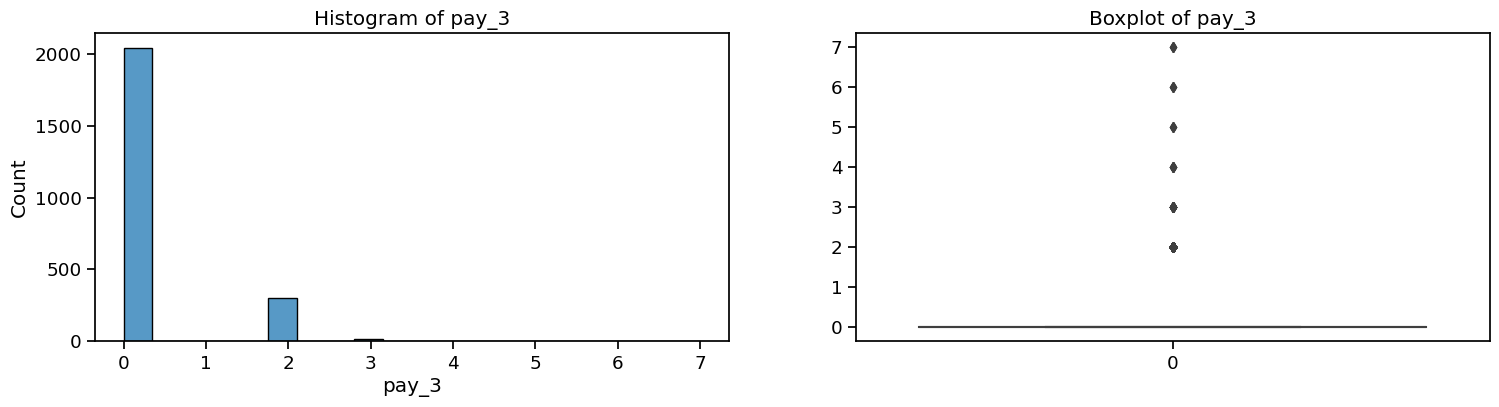

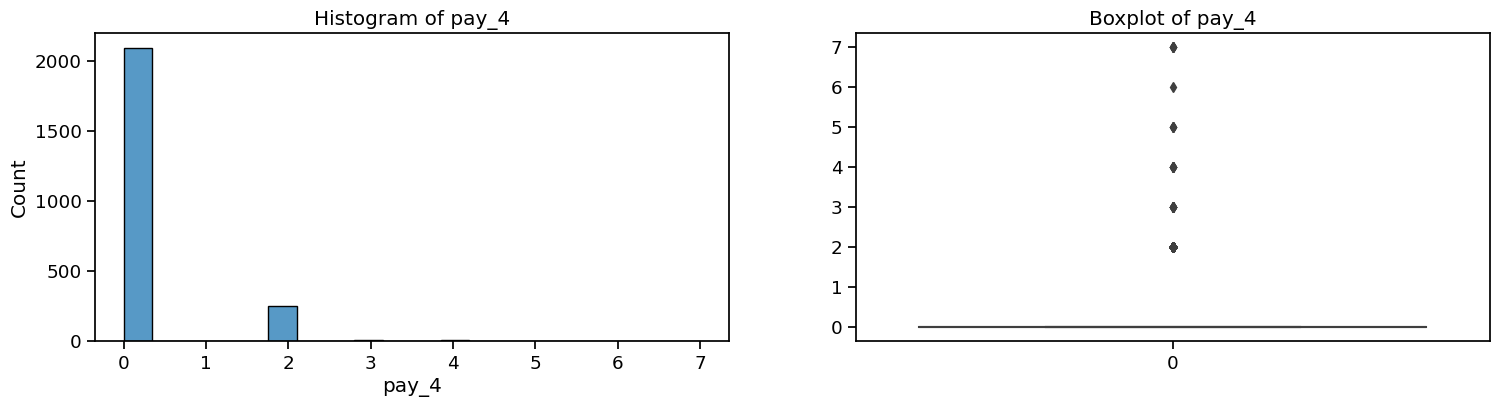

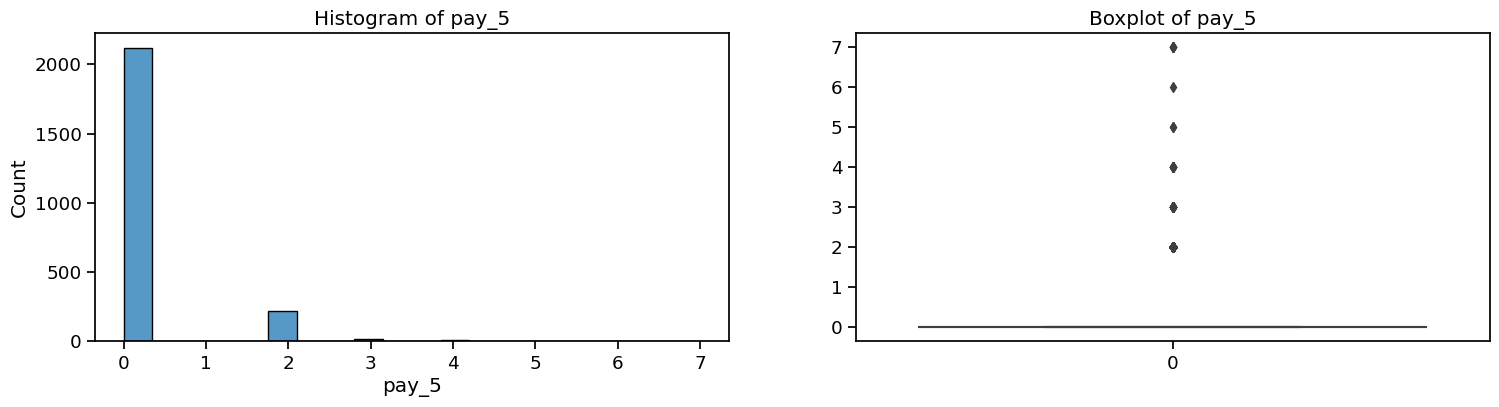

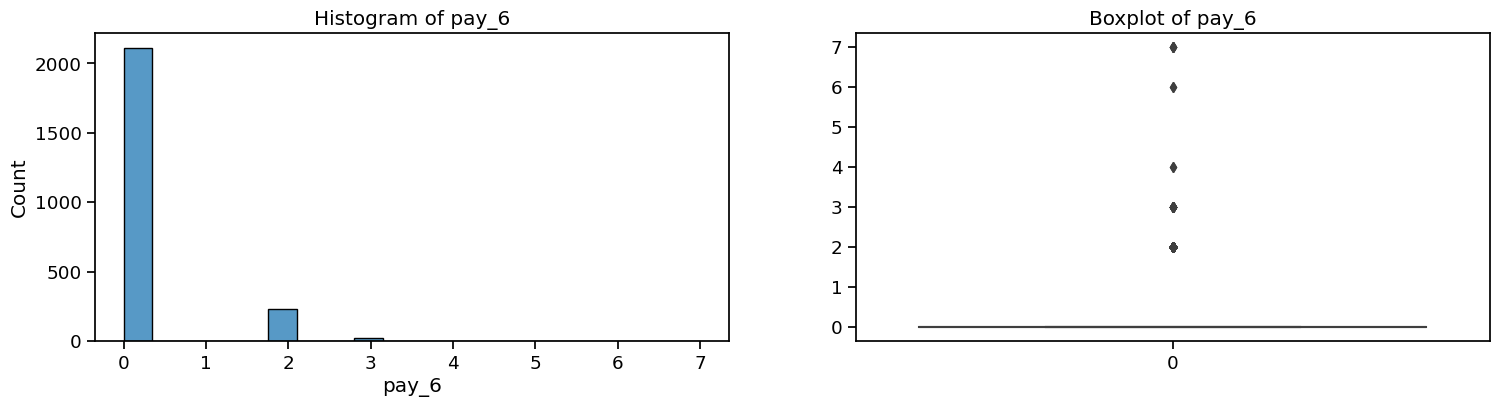

<Figure size 1800x400 with 0 Axes>

In [29]:
# Menampilkan grafik histogram dan boxplot
diagnostic_plots(X_train, 'pay_3', 'pay_4', 'pay_5', 'pay_6')

Statement:

- Diketahui bahwa dari grafik histogram dan nilai skew seluruh data memiliki distribusi tidak normal

- Selain itu diketahui juga bahwa seluruh data memiliki outlier. Outlier saya asumsikan sebagai `natural outlier`.

### Capping Outlier

Secara personal saya akan menggunakan cara capping karena dari seluruh data nilai outlier termasuk kedalam `natural outlier`

In [30]:
# Membuat capper pada data train
windsoriser = Winsorizer(capping_method='iqr',
                         tail='both',
                         fold=1.5,
                         variables=['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 
                                    'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'])

windsoriser.fit(X_train)
X_train_t = windsoriser.transform(X_train)

In [31]:
# Menampilkan nilai minimum dari tiap kolom
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Menampilkan nilai maximum dari tiap kolom
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'limit_balance': -220000.0, 'age': 8.5, 'bill_amt_1': -96356.25, 'bill_amt_2': -93615.0, 'bill_amt_3': -89039.25, 'bill_amt_4': -81843.5, 'bill_amt_5': -76709.5, 'bill_amt_6': -76631.5, 'pay_amt_1': -5114.25, 'pay_amt_2': -5242.5, 'pay_amt_3': -5429.0, 'pay_amt_4': -5382.0, 'pay_amt_5': -5249.0, 'pay_amt_6': -6075.0}
Right Tail Caps :  {'limit_balance': 500000.0, 'age': 60.5, 'bill_amt_1': 170621.75, 'bill_amt_2': 165157.0, 'bill_amt_3': 156398.75, 'bill_amt_4': 143192.5, 'bill_amt_5': 132342.5, 'bill_amt_6': 131252.5, 'pay_amt_1': 11215.75, 'pay_amt_2': 11145.5, 'pay_amt_3': 10303.0, 'pay_amt_4': 9630.0, 'pay_amt_5': 9591.0, 'pay_amt_6': 10205.0}


## Handling Missing Values

In [32]:
# Check Missing Value
X_train_t.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [33]:
# Check Misiing Value
X_test.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

Statement :

- Handling missing value pada feature tidak dilakukan karena tidak adanya nilai `null` yang ditemukan

## Feature Scaling

Dikarenakan distribusi nya tidak normal, maka `feature scaling` menggunakan `MinMaxScaler`

In [34]:
# Membagi kolom menjadi kolom scale dan non-scale
num_colums_nsc = ['sex', 'education_level', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
num_columns_sc = X.drop(num_colums_nsc, axis = 1).columns.tolist()

In [35]:
# Membagi data menjadi data scale dan non scale
X_train_sc = X_train_t[num_columns_sc]
X_test_sc = X_test[num_columns_sc]

X_train_nsc = X_train_t[num_colums_nsc]
X_test_nsc = X_test[num_colums_nsc]

In [36]:
scaler = MinMaxScaler() # Menggunakan syntax MinMaxScaler()
scaler.fit(X_train_sc) # Melatih data train

X_train_num_scaled = scaler.transform(X_train_sc) 
X_test_num_scaled = scaler.transform(X_test_sc)

In [37]:
# Menampilkan dataframe yang sudah di scaling pada data Train
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = num_columns_sc)
X_train_num_scaled


limit_balance       age  bill_amt_1  bill_amt_2  bill_amt_3  bill_amt_4  \
0          0.693878  0.506329    0.531842    0.652901    0.617218    0.690303   
1          0.387755  0.151899    0.678472    0.785958    0.756383    0.871307   
2          0.285714  0.126582    0.572810    0.682009    0.687950    0.772455   
3          0.081633  0.101266    0.080915    0.305454    0.267672    0.260816   
4          0.061224  0.455696    0.107045    0.313379    0.168245    0.263729   
...             ...       ...         ...         ...         ...         ...   
2366       0.775510  0.810127    0.066730    0.290206    0.139918    0.245639   
2367       0.265306  0.278481    0.730391    0.717697    0.598174    0.549132   
2368       0.081633  0.101266    0.215429    0.412746    0.301273    0.403304   
2369       0.265306  0.430380    0.787312    0.871722    0.864015    0.976707   
2370       0.081633  0.481013    0.238677    0.430788    0.327230    0.417760   

      bill_amt_5  bill_amt_6  pay_amt_1  pay_amt_2  pay_amt_3  pay_amt_4  \
0       0.673875    0.728218   0.445802   0.450047   0.485296   0.311526   
1       0.935394    0.963234   0.579631   0.000000   0.970591   0.415472   
2       0.260530    0.360204   0.668702   0.897223   0.194118   0.000000   
3       0.277561    0.373556   0.317143   1.000000   0.280404   0.317445   
4       0.266917    0.360204   0.480753   0.462160   0.333301   0.118692   
...          ...         ...        ...        ...        ...        ...   
2366    0.262447    0.366751   0.000000   0.000000   0.000000   0.035618   
2367    0.593135    0.513825   0.445802   0.358889   0.291177   0.311526   
2368    0.425547    0.499314   0.139536   0.124983   0.095118   0.103219   
2369    1.000000    0.980168   0.624122   0.000000   1.000000   0.498442   
2370    0.442008    0.523165   0.178321   0.269167   0.291177   0.311526   

      pay_amt_5  pay_amt_6  
0      0.312793   0.391965  
1      0.521322   0.000000  
2      0.000000   0.000000  
3      0.286310   1.000000  
4      0.000000   0.000000  
...         ...        ...  
2366   0.104264   0.105439  
2367   0.260661   0.000000  
2368   0.106767   0.086820  
2369   0.000000   0.489956  
2370   0.208529   0.097991  

[2371 rows x 14 columns]

In [38]:
# Menampilkan dataframe yang sudah di scaling pada data Train
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns = num_columns_sc)
X_test_num_scaled

limit_balance       age  bill_amt_1  bill_amt_2  bill_amt_3  bill_amt_4  \
0         0.224490  0.455696    0.125281    0.314376    0.169246    0.273734   
1         1.000000  0.329114    0.063376    0.291057    0.141007    0.246682   
2         0.591837  0.278481    0.064825    0.291341    0.141370    0.247029   
3         0.183673  0.379747    0.357228    0.526927    0.445574    0.557793   
4         0.387755  0.556962    0.067932    0.290180    0.139885    0.249100   
..             ...       ...         ...         ...         ...         ...   
588       0.428571  0.227848    0.098459    0.300447    0.148145    0.273028   
589       0.163265  0.455696    0.214726    0.291654    0.160453    0.245402   
590       0.346939  0.227848    0.063376    0.303507    0.183049    0.314567   
591       0.122449  0.101266    0.253861    0.383023    0.158286    0.245639   
592       0.081633  0.658228    0.308338    0.484152    0.161019    0.266253   

     bill_amt_5  bill_amt_6  pay_amt_1  pay_amt_2  pay_amt_3  pay_amt_4  \
0      0.290329    0.464266   0.000000   0.478489   0.517616   0.553790   
1      0.905316    0.946368   0.017654   0.000000   0.000000  11.983281   
2      0.262844    0.361491   0.023538   0.023687   0.025624   0.042991   
3      0.602181    0.663308   0.267481   0.179445   0.446472   0.311526   
4      0.272197    0.360935   0.000000   0.000000   0.064350   0.216822   
..          ...         ...        ...        ...        ...        ...   
588    0.376293    0.420785   0.214163   0.134853   0.507910   2.162825   
589    0.271175    0.470544   0.030047   0.335561   0.003688   0.202492   
590    0.265704    0.363670   0.275951   0.448612   0.584490   0.266459   
591    0.260530    0.360204   1.925596   0.299673   0.000000   0.000000   
592    0.283696    0.380799   0.209973   0.095465   0.013588   0.030737   

     pay_amt_5  pay_amt_6  
0     2.225837   0.522587  
1     0.647586   0.201274  
2     0.027526   0.025870  
3     0.229382   0.244978  
4     0.015640   0.058207  
..         ...        ...  
588   1.302263   0.156884  
589   2.360129   0.000000  
590   0.074132   0.237041  
591   0.000000   0.836355  
592   0.030862   0.029495  

[593 rows x 14 columns]

In [39]:
# Reset Index
X_train_num_scaled.reset_index(drop = True, inplace = True)
X_train_nsc.reset_index(drop = True, inplace = True)

X_test_num_scaled.reset_index(drop = True, inplace = True)
X_test_nsc.reset_index(drop = True, inplace = True)

In [40]:
# Menggabungkan data scaled dan non-scaled
X_train_num_use = pd.concat([X_train_num_scaled, X_train_nsc], axis = 1)
X_test_num_use = pd.concat([X_test_num_scaled, X_test_nsc], axis = 1)

In [41]:
# Menampilkan 3 data teratas
X_train_num_use.head(3)

limit_balance       age  bill_amt_1  bill_amt_2  bill_amt_3  bill_amt_4  \
0       0.693878  0.506329    0.531842    0.652901    0.617218    0.690303   
1       0.387755  0.151899    0.678472    0.785958    0.756383    0.871307   
2       0.285714  0.126582    0.572810    0.682009    0.687950    0.772455   

   bill_amt_5  bill_amt_6  pay_amt_1  pay_amt_2  pay_amt_3  pay_amt_4  \
0    0.673875    0.728218   0.445802   0.450047   0.485296   0.311526   
1    0.935394    0.963234   0.579631   0.000000   0.970591   0.415472   
2    0.260530    0.360204   0.668702   0.897223   0.194118   0.000000   

   pay_amt_5  pay_amt_6  sex  education_level  marital_status  pay_0  pay_2  \
0   0.312793   0.391965    2                2               1    0.0    0.0   
1   0.521322   0.000000    1                2               2    1.0    2.0   
2   0.000000   0.000000    2                3               1    0.0    0.0   

   pay_3  pay_4  pay_5  pay_6  
0    0.0    0.0    0.0    0.0  
1    2.0    2.0    2.0    2.0  
2    0.0    0.0    0.0    0.0

In [42]:
# Menampilkan 3 data teratas
X_test_num_use.isnull().sum()

limit_balance      0
age                0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
sex                0
education_level    0
marital_status     0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
dtype: int64

## Feature Enconding

Untuk feature encoding tidak saya lakukan karena data sudah termasuk numeric category

## Feature Selection

### Checking Correlation

#### Pearson

In [43]:
# Pearson
Xy_train = pd.concat([X_train_num_use, y_train], axis = 1)
Xy_corr = Xy_train.corr().default_payment_next_month.sort_values(ascending = False)

In [44]:
# Menampilkan data korelasi diatas 0
print(Xy_corr[Xy_corr > 0])

default_payment_next_month    1.000000
bill_amt_2                    0.047458
bill_amt_5                    0.039723
bill_amt_4                    0.037671
bill_amt_3                    0.037341
bill_amt_1                    0.031457
age                           0.029729
bill_amt_6                    0.029428
pay_5                         0.028049
pay_amt_5                     0.021446
pay_amt_3                     0.021227
pay_6                         0.018125
pay_2                         0.010298
marital_status                0.007636
pay_amt_4                     0.006551
pay_3                         0.006488
pay_0                         0.005190
pay_4                         0.003865
sex                           0.000774
Name: default_payment_next_month, dtype: float64


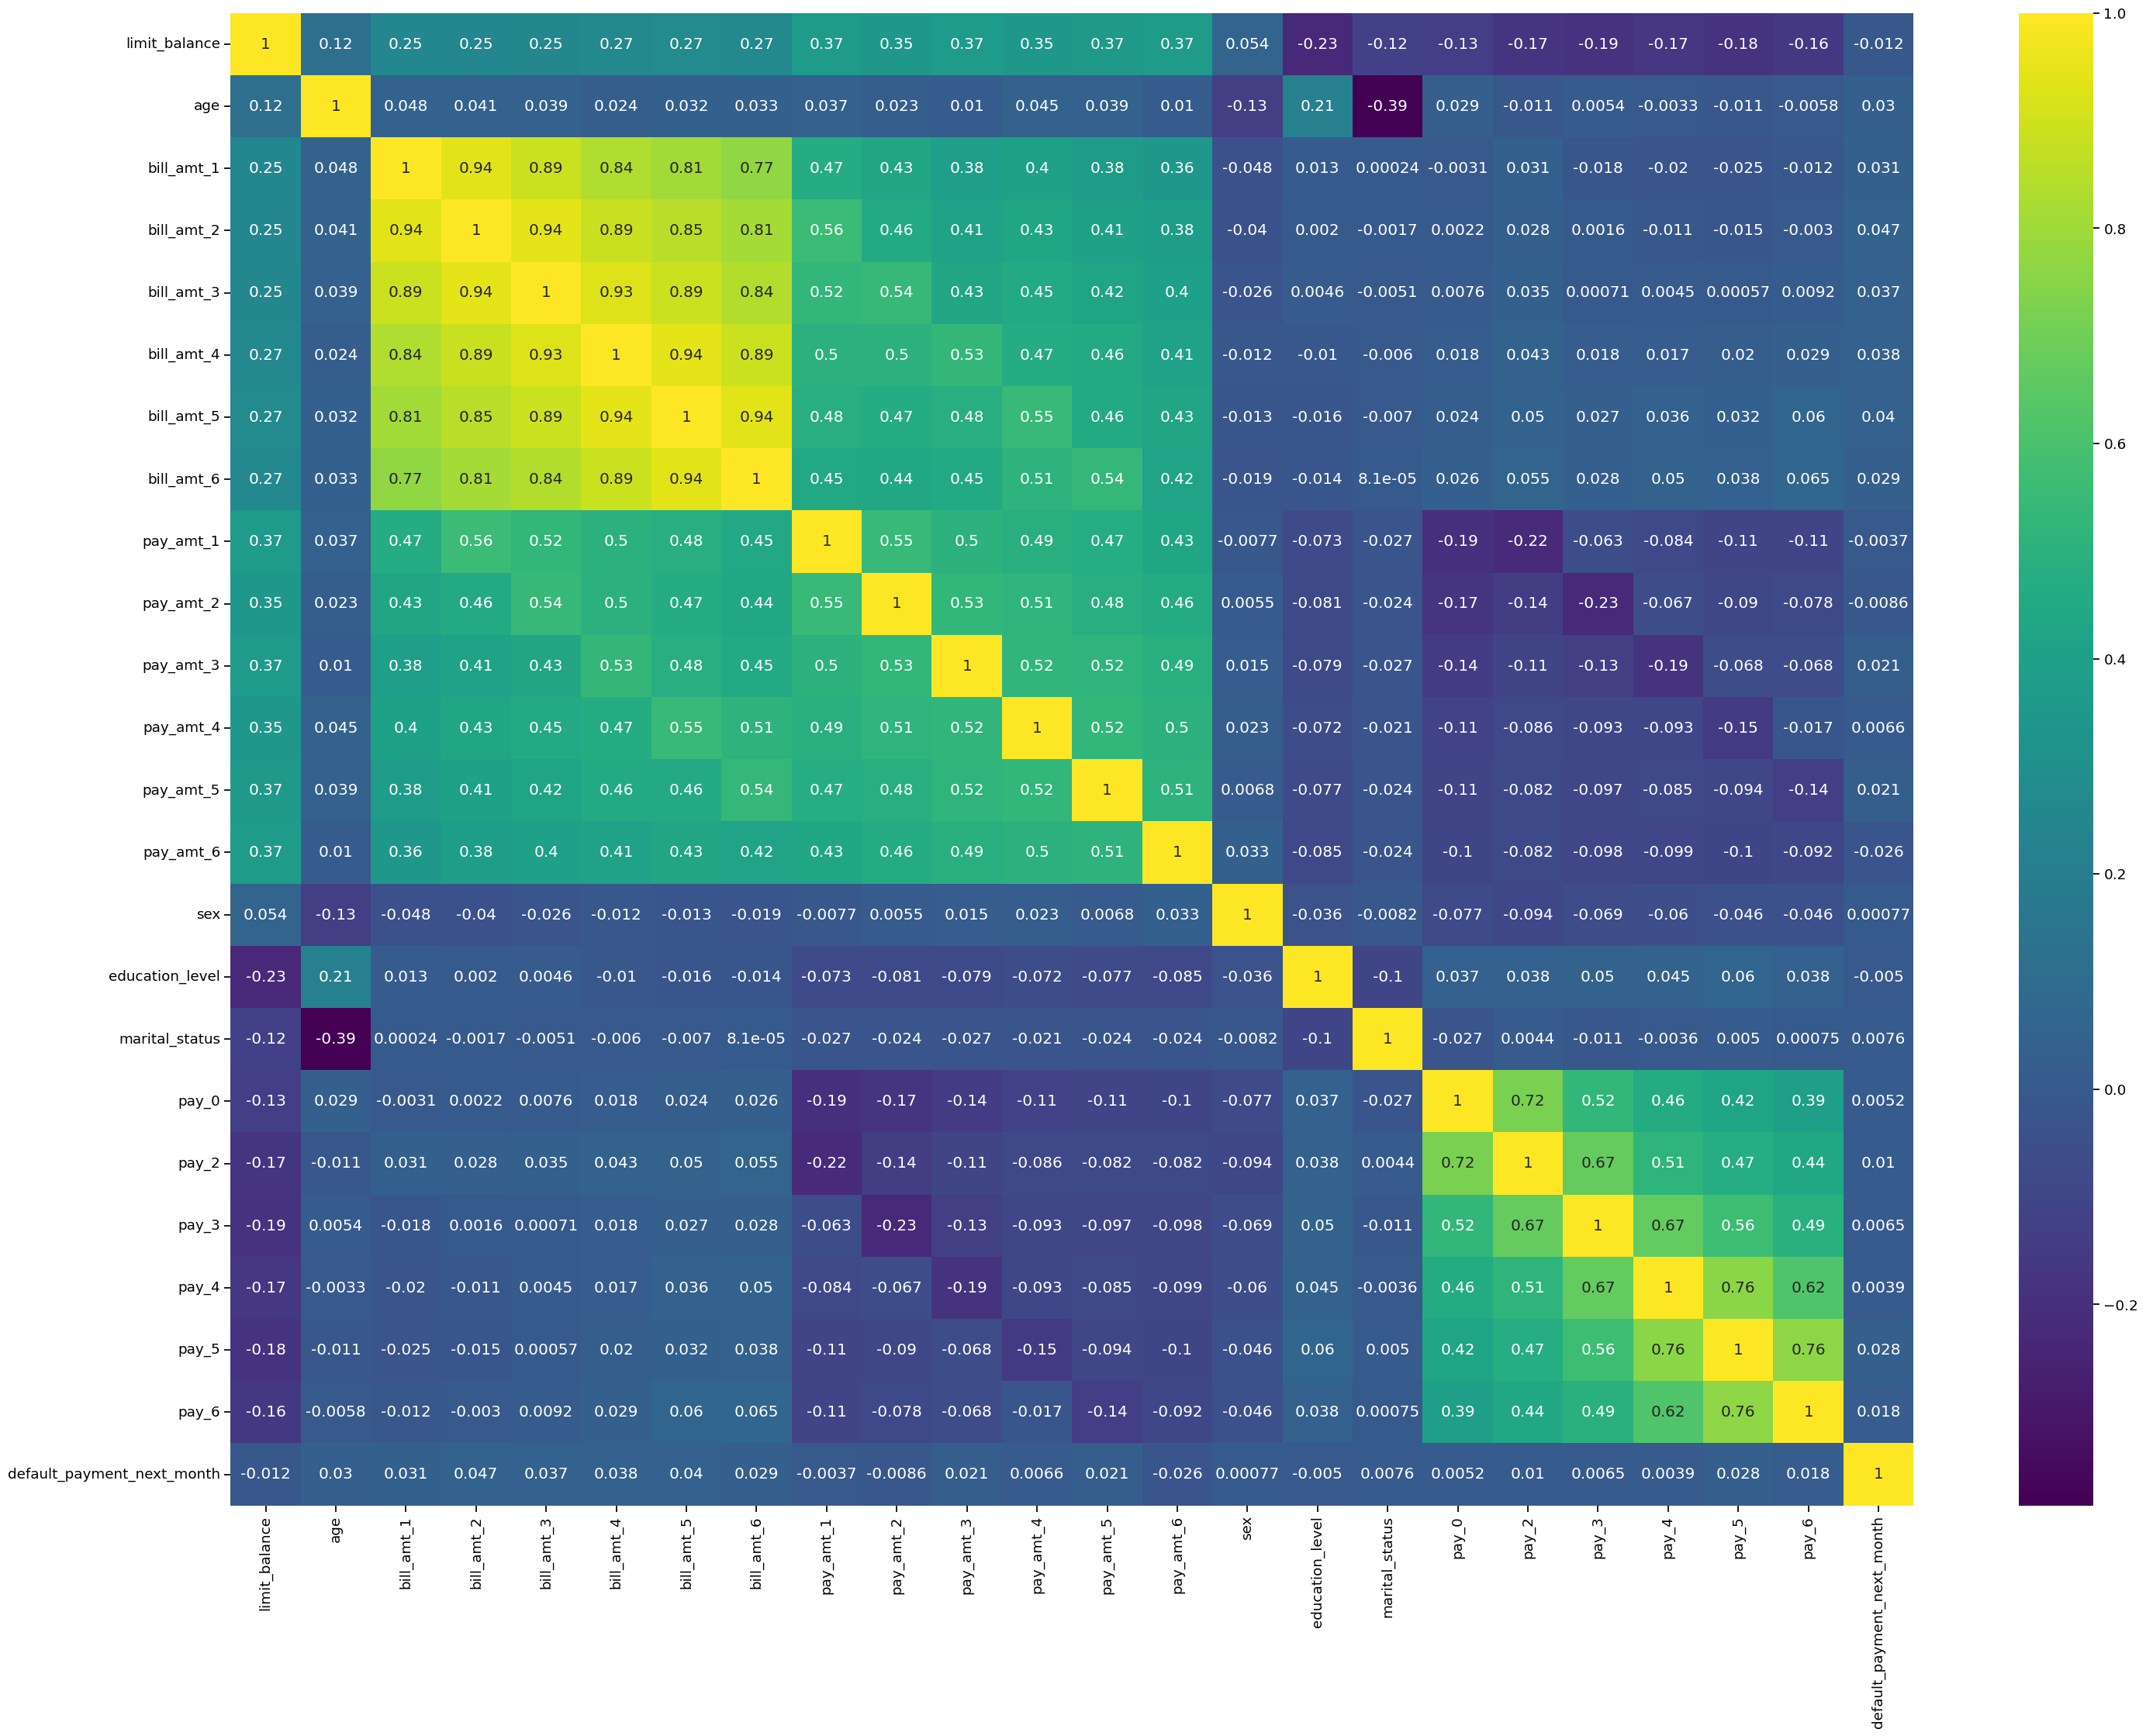

In [45]:
# Menampilkan Grafik Heat Map Korelasi pada Data Numerikal
f, ax = plt.subplots(1,1, figsize=(35,25))
ax = sns.heatmap(Xy_train.corr(), annot = True, cmap = 'viridis')

Statement :

- Berdasarkan korelasi menggunakan `pearson` diketahui feature yang memiliki korelasi secara linear positive dengan 'y' yaitu 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5','pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_4', 'sex', 'marital_status'

#### Multicollinearity

In [46]:
# Membuat function untuk menghitung nilai VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_train_num_use.columns
    vif["VIF"] = [variance_inflation_factor(X_train_num_use.values, i) for i in range(X_train_num_use.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [47]:
# Menampilkan nilai VIF
calc_vif(X_train_num_use)

variables        VIF
6        bill_amt_5  90.979178
3        bill_amt_2  79.338823
7        bill_amt_6  75.534884
5        bill_amt_4  74.594960
4        bill_amt_3  43.395760
2        bill_amt_1  16.379548
14              sex   9.647861
16   marital_status   8.551948
15  education_level   7.313426
8         pay_amt_1   4.815273
9         pay_amt_2   4.662703
10        pay_amt_3   4.422538
21            pay_5   4.316596
11        pay_amt_4   4.165915
12        pay_amt_5   3.996550
1               age   3.967862
20            pay_4   3.698943
0     limit_balance   3.543230
18            pay_2   3.474517
19            pay_3   3.223208
22            pay_6   2.948102
13        pay_amt_6   2.928008
17            pay_0   2.634469

Statement :

- Berdasarkan korelasi menggunakan `Multicollinearity` diketahui feature yang mumpuni digunakan yaitu 'age', 'limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt4', 'pay_amt_5', 'pay_amt_6', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6' karena nilai VIF < 5

### Chi2 Square

In [48]:
# Seleksi fitur dengan chi-square
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X_train_num_use, y_train)

df_scores = pd.DataFrame({'Feature': X_train_num_use.columns,
                          'Score': selector.scores_,
                          'p-value': selector.pvalues_.round(4)})

df_scores = df_scores.sort_values(by='Score', ascending=False)

df_scores

Feature       Score  p-value
17            pay_0  675.297815   0.0000
18            pay_2  631.112448   0.0000
19            pay_3  588.742196   0.0000
21            pay_5  545.544551   0.0000
20            pay_4  517.242540   0.0000
22            pay_6  476.649926   0.0000
9         pay_amt_2   16.222282   0.0001
13        pay_amt_6   15.923565   0.0001
0     limit_balance   15.162148   0.0001
8         pay_amt_1   14.594262   0.0001
11        pay_amt_4   13.872607   0.0002
10        pay_amt_3   10.628228   0.0011
12        pay_amt_5    8.933317   0.0028
15  education_level    2.542650   0.1108
14              sex    0.700641   0.4026
16   marital_status    0.505557   0.4771
1               age    0.217090   0.6413
2        bill_amt_1    0.212922   0.6445
4        bill_amt_3    0.089702   0.7646
5        bill_amt_4    0.085205   0.7704
3        bill_amt_2    0.052746   0.8184
6        bill_amt_5    0.031170   0.8599
7        bill_amt_6    0.011407   0.9149

Statement :

- Berdasarkan korelasi Chi2 Square 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6' memiliki korelasi terhadap target karena nilai p-value < dari 0.05 (c-value)

### Filtering Data yang Akan Digunakan

Feature berdasarkan korelasi multicollinearity

In [49]:
# Filter feature
feat1_train = X_train_num_use.loc[:,['age', 'limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]

feat1_test = X_test_num_use.loc[:,['age', 'limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]

#### Feature 2

Feature berdasarkan korelasi Chi2 Square

In [50]:
# Filter feature
feat2_train = X_train_num_use.loc[:,['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'limit_balance', 
                                     'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]

feat2_test = X_test_num_use.loc[:,['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'limit_balance', 
                                   'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]

#### Feature 3

In [51]:
feat3_train = X_train_num_use

feat3_test = X_test_num_use

# **VI. Model Definition**

- Model yang digunakan yakni model `Logistic Regression`, `SVM`, `Decision Tree`, `Random Forest`, `KNN`, `Naive Bayes`, dan `AdaBoost` karena data perdict bertipe kategorikal

# **VII. Model Training**

Memanggil dan Melatih Data berdasarkan korelasi Chi2

In [52]:
X_train_pred = feat2_train
X_test_pred = feat2_test

## Logistic Regression

In [53]:
# Membuat variable untuk model logistic regression
default_logreg = LogisticRegression()
default_logreg.fit(X_train_pred, y_train)

LogisticRegression()

In [54]:
# Menampilkan class model atau income_bracket
default_logreg.classes_

array([0, 1], dtype=int64)

In [55]:
# Melakukan prediksi
y_pred_train_log = default_logreg.predict(X_train_pred)
y_pred_test_log = default_logreg.predict(X_test_pred)

Evaluation Logistic Regression
Training score: 0.8305
Test score: 0.8263 

Classification Report Train-set Logistic Regression :
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1863
           1       0.70      0.36      0.48       508

    accuracy                           0.83      2371
   macro avg       0.77      0.66      0.69      2371
weighted avg       0.82      0.83      0.81      2371
 

Confusion Matrix      : 


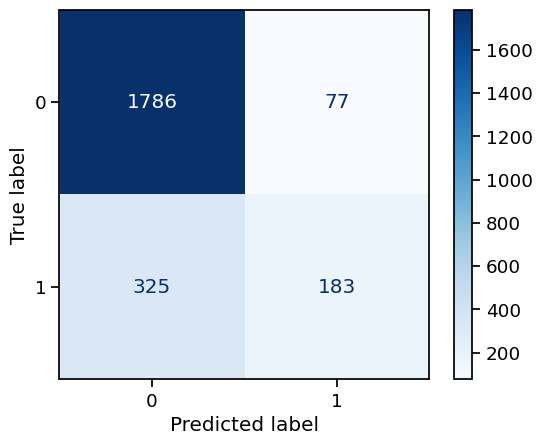

In [56]:
# Menampilkan akurasi prediksi
print("Evaluation Logistic Regression")
print('Training score: {:.4f}'.format(default_logreg.score(X_train_pred, y_train)))
print('Test score: {:.4f}'.format(default_logreg.score(X_test_pred, y_test)), '\n')
# Menampilkan classification report untuk data Train
print('Classification Report Train-set Logistic Regression :')
print(classification_report(y_train,y_pred_train_log), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(default_logreg, X_train_pred, y_train, cmap='Blues'))

Cross-Validation

In [57]:
# Cross validation
f1_cv_log = cross_val_score(default_logreg, 
                                           X_train_pred, 
                                           y_train, 
                                           cv=5, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_cv_log)
print('F1 Score - Mean - Cross Validation : ', f1_cv_log.mean())
print('F1 Score - Std - Cross Validation  : ', f1_cv_log.std())
print('F1 Score - Range of Test-Set       : ', (f1_cv_log.mean()-f1_cv_log.std()) , '-', (f1_cv_log.mean()+f1_cv_log.std()))

F1 Score - All - Cross Validation  :  [0.47741935 0.50980392 0.38848921 0.45454545 0.4852071 ]
F1 Score - Mean - Cross Validation :  0.4630930080355203
F1 Score - Std - Cross Validation  :  0.041267358290420615
F1 Score - Range of Test-Set       :  0.4218256497450997 - 0.504360366325941


F1 Score - Test Set   :  0.47179487179487184 

ROC-AUC :  0.6574972119901321 

Classification Report Test-set Logistic Regression : 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       466
           1       0.68      0.36      0.47       127

    accuracy                           0.83       593
   macro avg       0.76      0.66      0.68       593
weighted avg       0.81      0.83      0.81       593
 

Confusion Matrix      : 


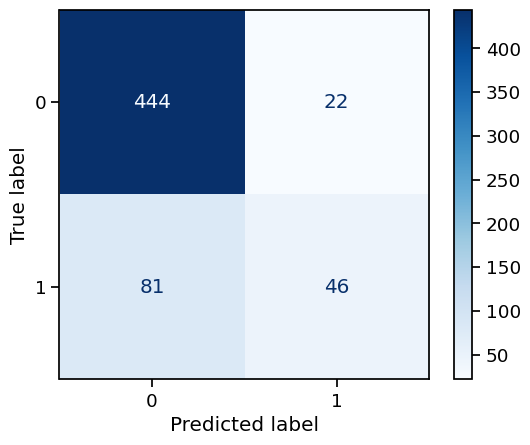

In [58]:
# Check setelah cross-val
y_pred_test_log = default_logreg.predict(X_test_pred)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_log), '\n')
print('ROC-AUC : ', roc_auc_score(y_test, y_pred_test_log), '\n')
print('Classification Report Test-set Logistic Regression : \n', classification_report(y_test, y_pred_test_log), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(default_logreg, X_test_pred, y_test, cmap='Blues'))

## Support Vector Machine (SVC)

In [59]:
# Menggunakan SVC untuk modeling
default_svc = SVC()
default_svc.fit(X_train_pred, y_train)

SVC()

In [60]:
# Melakukan prediksi
y_pred_train_svc = default_svc.predict(X_train_pred)
y_pred_test_svc = default_svc.predict(X_test_pred)

Evaluation Support Vector Machine (SVC)
Training score: 0.8520
Test score: 0.7740 

Classification Report Train-set SVC :
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1863
           1       0.74      0.48      0.58       508

    accuracy                           0.85      2371
   macro avg       0.80      0.72      0.75      2371
weighted avg       0.84      0.85      0.84      2371
 

Confusion Matrix      : 


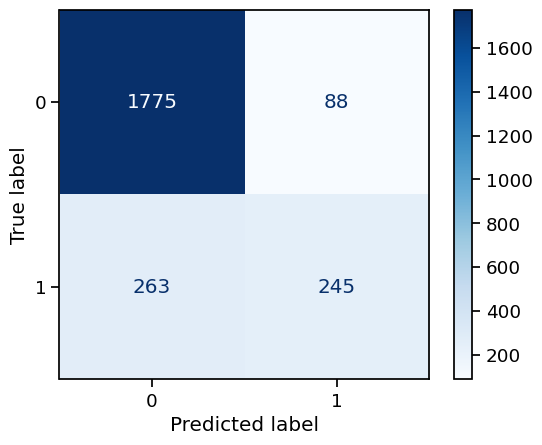

In [61]:
# Menampilkan akurasi prediksi
print("Evaluation Support Vector Machine (SVC)")
print('Training score: {:.4f}'.format(default_svc.score(X_train_pred, y_train)))
print('Test score: {:.4f}'.format(default_svc.score(X_test_pred, y_test)), '\n')
# Menampilkan classification report untuk data Train
print('Classification Report Train-set SVC :')
print(classification_report(y_train,y_pred_train_svc), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(default_svc, X_train_pred, y_train, cmap='Blues'))

Cross-Validation

In [62]:
# Cross validation
f1_cv_svc = cross_val_score(default_svc, 
                                           X_train_pred, 
                                           y_train, 
                                           cv=5, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_cv_svc)
print('F1 Score - Mean - Cross Validation : ', f1_cv_svc.mean())
print('F1 Score - Std - Cross Validation  : ', f1_cv_svc.std())
print('F1 Score - Range of Test-Set       : ', (f1_cv_svc.mean()-f1_cv_svc.std()) , '-', (f1_cv_svc.mean()+f1_cv_svc.std()))

F1 Score - All - Cross Validation  :  [0.52439024 0.5952381  0.41333333 0.51807229 0.52406417]
F1 Score - Mean - Cross Validation :  0.5150196265506978
F1 Score - Std - Cross Validation  :  0.058230637901189895
F1 Score - Range of Test-Set       :  0.4567889886495079 - 0.5732502644518876


F1 Score - Test Set   :  0.4640000000000001 

ROC-AUC :  0.6586039674225271 

Classification Report Test-set SVC : 
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       466
           1       0.47      0.46      0.46       127

    accuracy                           0.77       593
   macro avg       0.66      0.66      0.66       593
weighted avg       0.77      0.77      0.77       593
 

Confusion Matrix      : 


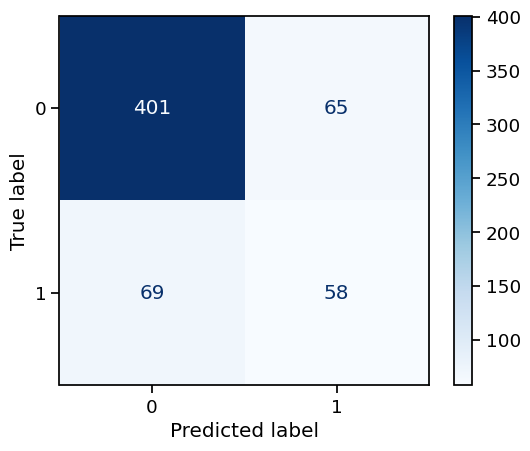

In [63]:
# Check setelah cross-val
y_pred_test_svc = default_svc.predict(X_test_pred)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_svc), '\n')
print('ROC-AUC : ', roc_auc_score(y_test, y_pred_test_svc), '\n')
print('Classification Report Test-set SVC : \n', classification_report(y_test, y_pred_test_svc), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(default_svc, X_test_pred, y_test, cmap='Blues'))

## Decision Tree

In [64]:
# Menggunakan Decision Tree untuk modeling
default_dt = DecisionTreeClassifier()
default_dt.fit(X_train_pred, y_train)

DecisionTreeClassifier()

In [65]:
# Melakukan prediksi
y_pred_train_dt = default_dt.predict(X_train_pred)
y_pred_test_dt = default_dt.predict(X_test_pred)

Evaluation Decision Tree
Training score: 0.9941
Test score: 0.7184 

Classification Report Train-set Decision Tree :
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1863
           1       1.00      0.97      0.99       508

    accuracy                           0.99      2371
   macro avg       1.00      0.99      0.99      2371
weighted avg       0.99      0.99      0.99      2371
 

Confusion Matrix      : 


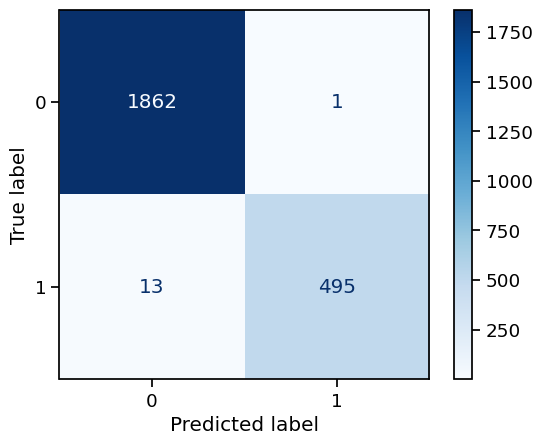

In [66]:
# Menampilkan akurasi prediksi
print("Evaluation Decision Tree")
print('Training score: {:.4f}'.format(default_dt.score(X_train_pred, y_train)))
print('Test score: {:.4f}'.format(default_dt.score(X_test_pred, y_test)), '\n')
# Menampilkan classification report untuk data Train
print('Classification Report Train-set Decision Tree :')
print(classification_report(y_train,y_pred_train_dt), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(default_dt, X_train_pred, y_train, cmap='Blues'))

Cross-Validation

In [67]:
# Cross validation
f1_cv_dt = cross_val_score(default_dt, 
                                           X_train_pred, 
                                           y_train, 
                                           cv=5, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_cv_dt)
print('F1 Score - Mean - Cross Validation : ', f1_cv_dt.mean())
print('F1 Score - Std - Cross Validation  : ', f1_cv_dt.std())
print('F1 Score - Range of Test-Set       : ', (f1_cv_dt.mean()-f1_cv_dt.std()) , '-', (f1_cv_dt.mean()+f1_cv_dt.std()))

F1 Score - All - Cross Validation  :  [0.37209302 0.4195122  0.44670051 0.41176471 0.40869565]
F1 Score - Mean - Cross Validation :  0.4117532168096488
F1 Score - Std - Cross Validation  :  0.023932382519330195
F1 Score - Range of Test-Set       :  0.3878208342903186 - 0.43568559932897905


F1 Score - Test Set   :  0.369811320754717 

ROC-AUC :  0.597419823595012 

Classification Report Test-set Decision Tree : 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       466
           1       0.36      0.39      0.37       127

    accuracy                           0.72       593
   macro avg       0.59      0.60      0.59       593
weighted avg       0.73      0.72      0.72       593
 

Confusion Matrix      : 


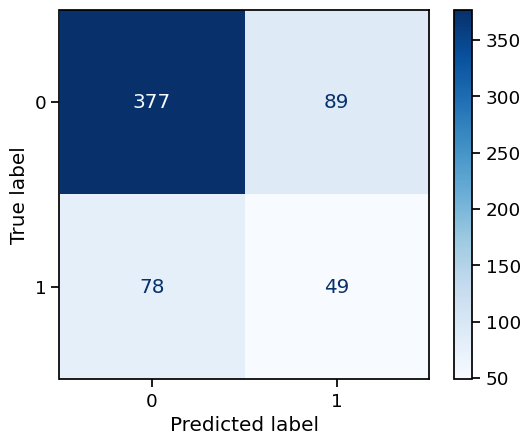

In [68]:
# Check setelah cross-val
y_pred_test_dt = default_dt.predict(X_test_pred)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_dt), '\n')
print('ROC-AUC : ', roc_auc_score(y_test, y_pred_test_dt), '\n')
print('Classification Report Test-set Decision Tree : \n', classification_report(y_test, y_pred_test_dt), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(default_dt, X_test_pred, y_test, cmap='Blues'))

## Random Forest

In [69]:
# Menggunakan Random Forest untuk modeling
default_rf = RandomForestClassifier()
default_rf.fit(X_train_pred, y_train)

RandomForestClassifier()

In [70]:
# Melakukan prediksi
y_pred_train_rf = default_rf.predict(X_train_pred)
y_pred_test_rf = default_rf.predict(X_test_pred)

Evaluation Random Forest
Training score: 0.9941
Test score: 0.8331 

Classification Report Train-set Random Forest :
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1863
           1       1.00      0.98      0.99       508

    accuracy                           0.99      2371
   macro avg       0.99      0.99      0.99      2371
weighted avg       0.99      0.99      0.99      2371
 

Confusion Matrix      : 


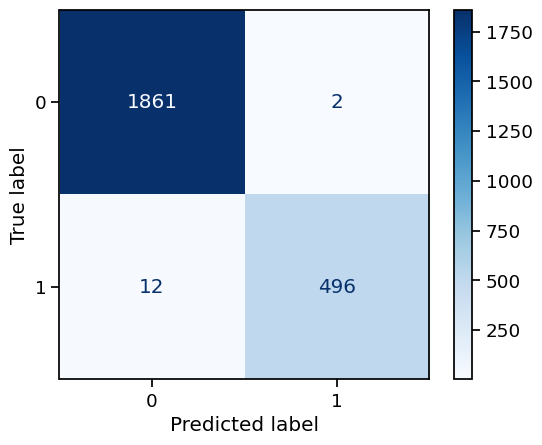

In [71]:
# Menampilkan akurasi prediksi
print("Evaluation Random Forest")
print('Training score: {:.4f}'.format(default_rf.score(X_train_pred, y_train)))
print('Test score: {:.4f}'.format(default_rf.score(X_test_pred, y_test)), '\n')
# Menampilkan classification report untuk data Train
print('Classification Report Train-set Random Forest :')
print(classification_report(y_train,y_pred_train_rf), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(default_rf, X_train_pred, y_train, cmap='Blues'))

Cross-Validation

In [72]:
# Cross validation
f1_cv_rf = cross_val_score(default_rf, 
                                           X_train_pred, 
                                           y_train, 
                                           cv=5, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_cv_rf)
print('F1 Score - Mean - Cross Validation : ', f1_cv_rf.mean())
print('F1 Score - Std - Cross Validation  : ', f1_cv_rf.std())
print('F1 Score - Range of Test-Set       : ', (f1_cv_rf.mean()-f1_cv_rf.std()) , '-', (f1_cv_rf.mean()+f1_cv_rf.std()))

F1 Score - All - Cross Validation  :  [0.49101796 0.58682635 0.42666667 0.45       0.46666667]
F1 Score - Mean - Cross Validation :  0.48423552894211586
F1 Score - Std - Cross Validation  :  0.055436067151314154
F1 Score - Range of Test-Set       :  0.4287994617908017 - 0.53967159609343


F1 Score - Test Set   :  0.5217391304347827 

ROC-AUC :  0.684701429488696 

Classification Report Test-set Random Forest : 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       466
           1       0.68      0.43      0.52       127

    accuracy                           0.83       593
   macro avg       0.77      0.68      0.71       593
weighted avg       0.82      0.83      0.82       593
 

Confusion Matrix      : 


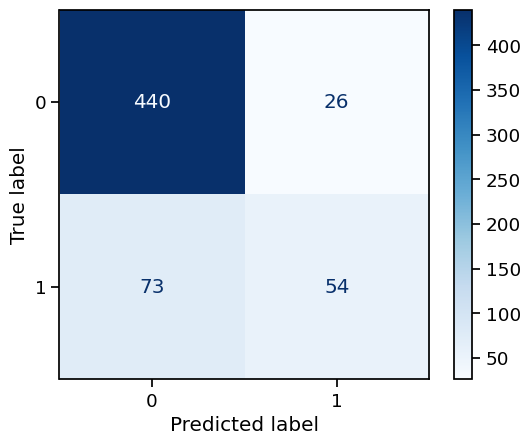

In [73]:
# Check setelah cross-val
y_pred_test_rf = default_rf.predict(X_test_pred)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_rf), '\n')
print('ROC-AUC : ', roc_auc_score(y_test, y_pred_test_rf), '\n')
print('Classification Report Test-set Random Forest : \n', classification_report(y_test, y_pred_test_rf), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(default_rf, X_test_pred, y_test, cmap='Blues'))

## KNN

In [74]:
# Menggunakan best SVC untuk modeling
default_knn = KNeighborsClassifier()
default_knn.fit(X_train_pred, y_train)

KNeighborsClassifier()

In [75]:
# Melakukan prediksi
y_pred_train_knn = default_knn.predict(X_train_pred)
y_pred_test_knn = default_knn.predict(X_test_pred)

Evaluation KNN
Training score: 0.8570
Test score: 0.8111 

Classification Report Train-set KNN :
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1863
           1       0.75      0.50      0.60       508

    accuracy                           0.86      2371
   macro avg       0.81      0.73      0.76      2371
weighted avg       0.85      0.86      0.85      2371
 

Confusion Matrix      : 


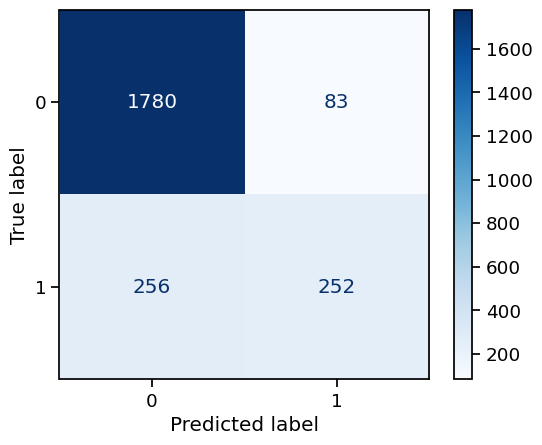

In [76]:
# Menampilkan akurasi prediksi
print("Evaluation KNN")
print('Training score: {:.4f}'.format(default_knn.score(X_train_pred, y_train)))
print('Test score: {:.4f}'.format(default_knn.score(X_test_pred, y_test)), '\n')
# Menampilkan classification report untuk data Train
print('Classification Report Train-set KNN :')
print(classification_report(y_train,y_pred_train_knn), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(default_knn, X_train_pred, y_train, cmap='Blues'))

Cross-Validation

In [77]:
# Cross validation
f1_cv_knn = cross_val_score(default_knn, 
                                           X_train_pred, 
                                           y_train, 
                                           cv=5, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_cv_knn)
print('F1 Score - Mean - Cross Validation : ', f1_cv_knn.mean())
print('F1 Score - Std - Cross Validation  : ', f1_cv_knn.std())
print('F1 Score - Range of Test-Set       : ', (f1_cv_knn.mean()-f1_cv_knn.std()) , '-', (f1_cv_knn.mean()+f1_cv_knn.std()))

F1 Score - All - Cross Validation  :  [0.4691358  0.58285714 0.38961039 0.4852071  0.48087432]
F1 Score - Mean - Cross Validation :  0.48153695049365497
F1 Score - Std - Cross Validation  :  0.06145562876367598
F1 Score - Range of Test-Set       :  0.420081321729979 - 0.5429925792573309


F1 Score - Test Set   :  0.4666666666666667 

ROC-AUC :  0.6564326991314927 

Classification Report Test-set KNN : 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       466
           1       0.59      0.39      0.47       127

    accuracy                           0.81       593
   macro avg       0.72      0.66      0.68       593
weighted avg       0.79      0.81      0.80       593
 

Confusion Matrix      : 


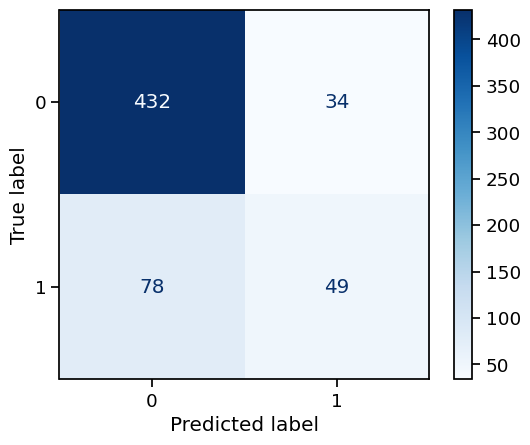

In [78]:
# Check setelah cross-val
y_pred_test_knn = default_knn.predict(X_test_pred)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_knn), '\n')
print('ROC-AUC : ', roc_auc_score(y_test, y_pred_test_knn), '\n')
print('Classification Report Test-set KNN : \n', classification_report(y_test, y_pred_test_knn), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(default_knn, X_test_pred, y_test, cmap='Blues'))

## Naive Bayes

In [79]:
# Menggunakan best SVC untuk modeling
default_nb = GaussianNB()
default_nb.fit(X_train_pred, y_train)

GaussianNB()

In [80]:
# Melakukan prediksi
y_pred_train_nb = default_nb.predict(X_train_pred)
y_pred_test_nb = default_nb.predict(X_test_pred)

Evaluation Naive Bayes
Training score: 0.7959
Test score: 0.7589 

Classification Report Train-set Naive Bayes :
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1863
           1       0.52      0.54      0.53       508

    accuracy                           0.80      2371
   macro avg       0.70      0.70      0.70      2371
weighted avg       0.80      0.80      0.80      2371
 

Confusion Matrix      : 


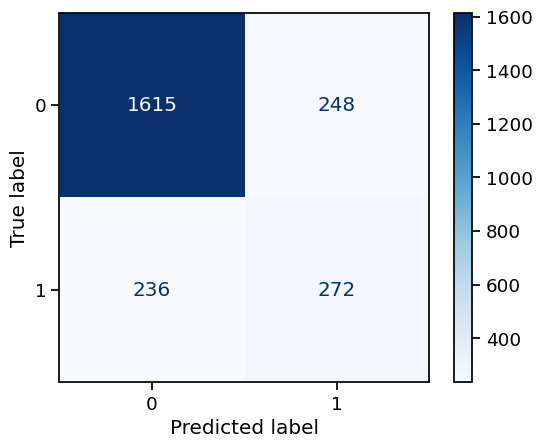

In [81]:
# Menampilkan akurasi prediksi
print("Evaluation Naive Bayes")
print('Training score: {:.4f}'.format(default_nb.score(X_train_pred, y_train)))
print('Test score: {:.4f}'.format(default_nb.score(X_test_pred, y_test)), '\n')
# Menampilkan classification report untuk data Train
print('Classification Report Train-set Naive Bayes :')
print(classification_report(y_train,y_pred_train_nb), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(default_nb, X_train_pred, y_train, cmap='Blues'))

Cross-Validation

In [82]:
# Cross validation
f1_cv_nb = cross_val_score(default_nb, 
                                           X_train_pred, 
                                           y_train, 
                                           cv=5, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_cv_nb)
print('F1 Score - Mean - Cross Validation : ', f1_cv_nb.mean())
print('F1 Score - Std - Cross Validation  : ', f1_cv_nb.std())
print('F1 Score - Range of Test-Set       : ', (f1_cv_nb.mean()-f1_cv_nb.std()) , '-', (f1_cv_nb.mean()+f1_cv_nb.std()))

F1 Score - All - Cross Validation  :  [0.52830189 0.58937198 0.46927374 0.55208333 0.48717949]
F1 Score - Mean - Cross Validation :  0.5252420861996723
F1 Score - Std - Cross Validation  :  0.043413535160722806
F1 Score - Range of Test-Set       :  0.48182855103894945 - 0.568655621360395


F1 Score - Test Set   :  0.45210727969348663 

ROC-AUC :  0.6518113615626373 

Classification Report Test-set Naive Bayes : 
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       466
           1       0.44      0.46      0.45       127

    accuracy                           0.76       593
   macro avg       0.65      0.65      0.65       593
weighted avg       0.76      0.76      0.76       593
 

Confusion Matrix      : 


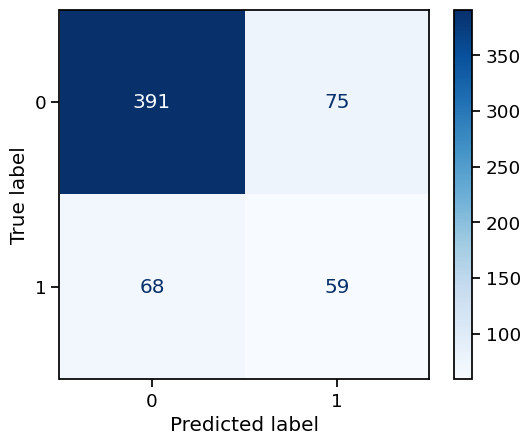

In [83]:
# Check setelah cross-val
y_pred_test_nb = default_nb.predict(X_test_pred)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_nb), '\n')
print('ROC-AUC : ', roc_auc_score(y_test, y_pred_test_nb), '\n')
print('Classification Report Test-set Naive Bayes : \n', classification_report(y_test, y_pred_test_nb), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(default_nb, X_test_pred, y_test, cmap='Blues'))

## Ada Boost

In [84]:
# Menggunakan best SVC untuk modeling
default_ab = AdaBoostClassifier()
default_ab.fit(X_train_pred, y_train)

AdaBoostClassifier()

In [85]:
# Melakukan prediksi
y_pred_train_ab = default_ab.predict(X_train_pred)
y_pred_test_ab = default_ab.predict(X_test_pred)

Evaluation AdaBoost
Training score: 0.8439
Test score: 0.8314 

Classification Report Train-set AdaBoost :
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1863
           1       0.75      0.41      0.53       508

    accuracy                           0.84      2371
   macro avg       0.80      0.69      0.72      2371
weighted avg       0.83      0.84      0.83      2371
 

Confusion Matrix      : 


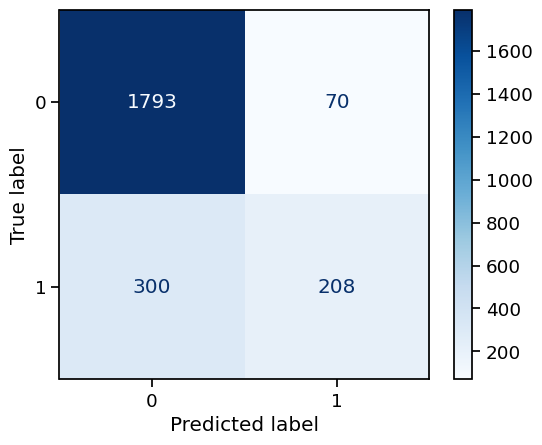

In [86]:
# Menampilkan akurasi prediksi
print("Evaluation AdaBoost")
print('Training score: {:.4f}'.format(default_ab.score(X_train_pred, y_train)))
print('Test score: {:.4f}'.format(default_ab.score(X_test_pred, y_test)), '\n')
# Menampilkan classification report untuk data Train
print('Classification Report Train-set AdaBoost :')
print(classification_report(y_train,y_pred_train_ab), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(default_ab, X_train_pred, y_train, cmap='Blues'))

Cross-Validation

In [87]:
# Cross validation
f1_cv_ab = cross_val_score(default_ab, 
                                           X_train_pred, 
                                           y_train, 
                                           cv=5, 
                                           scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_cv_ab)
print('F1 Score - Mean - Cross Validation : ', f1_cv_ab.mean())
print('F1 Score - Std - Cross Validation  : ', f1_cv_ab.std())
print('F1 Score - Range of Test-Set       : ', (f1_cv_ab.mean()-f1_cv_ab.std()) , '-', (f1_cv_ab.mean()+f1_cv_ab.std()))

F1 Score - All - Cross Validation  :  [0.50955414 0.5443038  0.41958042 0.4875     0.52380952]
F1 Score - Mean - Cross Validation :  0.49694957619713725
F1 Score - Std - Cross Validation  :  0.04289063994790245
F1 Score - Range of Test-Set       :  0.4540589362492348 - 0.5398402161450397


F1 Score - Test Set   :  0.489795918367347 

ROC-AUC :  0.6664441891115542 

Classification Report Test-set AdaBoost : 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       466
           1       0.70      0.38      0.49       127

    accuracy                           0.83       593
   macro avg       0.77      0.67      0.69       593
weighted avg       0.82      0.83      0.81       593
 

Confusion Matrix      : 


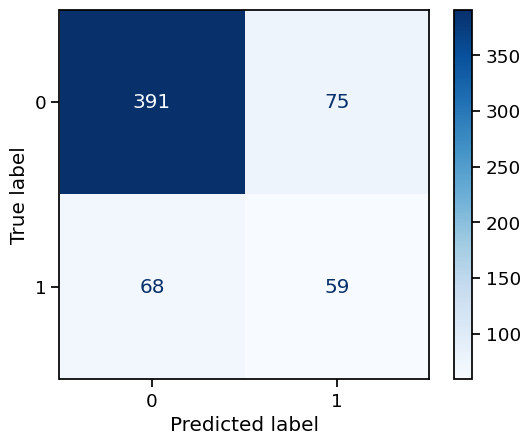

In [88]:
# Check setelah cross-val
y_pred_test_ab = default_ab.predict(X_test_pred)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_ab), '\n')
print('ROC-AUC : ', roc_auc_score(y_test, y_pred_test_ab), '\n')
print('Classification Report Test-set AdaBoost : \n', classification_report(y_test, y_pred_test_ab), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(default_nb, X_test_pred, y_test, cmap='Blues'))

# **IX. Model Evaluation**

In [89]:
print('Evaluation Logistic Regression : ')
print('F1 Score Train : ', f1_score(y_train, y_pred_train_log))
print('F1 Score Test :', f1_score(y_test, y_pred_test_log))
print('Cross-Val mean :', f1_cv_log.mean())
print('Cross-Val std :', f1_cv_log.std())
print('')
print('Evaluation Support Machine Vector (SVC) : ')
print('F1 Score Train : ', f1_score(y_train, y_pred_train_svc))
print('F1 Score Test :', f1_score(y_test, y_pred_test_svc))
print('Cross-Val mean :', f1_cv_svc.mean())
print('Cross-Val std :', f1_cv_svc.std())
print('')
print('Evaluation Decision Tree : ')
print('F1 Score Train : ', f1_score(y_train, y_pred_train_dt))
print('F1 Score Test :', f1_score(y_test, y_pred_test_dt))
print('Cross-Val mean :', f1_cv_dt.mean())
print('Cross-Val std :', f1_cv_dt.std())
print('')
print('Evaluation Random Forest : ')
print('F1 Score Train : ', f1_score(y_train, y_pred_train_rf))
print('F1 Score Test :', f1_score(y_test, y_pred_test_rf))
print('Cross-Val mean :', f1_cv_rf.mean())
print('Cross-Val std :', f1_cv_rf.std())
print('')
print('Evaluation KNN : ')
print('F1 Score Train : ', f1_score(y_train, y_pred_train_knn))
print('F1 Score Test :', f1_score(y_test, y_pred_test_knn))
print('Cross-Val mean :', f1_cv_knn.mean())
print('Cross-Val std :', f1_cv_knn.std())
print('')
print('Evaluation Naive Bayes : ')
print('F1 Score Train : ', f1_score(y_train, y_pred_train_nb))
print('F1 Score Test :', f1_score(y_test, y_pred_test_nb))
print('Cross-Val mean :', f1_cv_nb.mean())
print('Cross-Val std :', f1_cv_nb.std())
print('')
print('Evaluation AdaBoost : ')
print('F1 Score Train : ', f1_score(y_train, y_pred_train_ab))
print('F1 Score Test :', f1_score(y_test, y_pred_test_ab))
print('Cross-Val mean :', f1_cv_ab.mean())
print('Cross-Val std :', f1_cv_ab.std())
print('')

Evaluation Logistic Regression : 
F1 Score Train :  0.47656250000000006
F1 Score Test : 0.47179487179487184
Cross-Val mean : 0.4630930080355203
Cross-Val std : 0.041267358290420615

Evaluation Support Machine Vector (SVC) : 
F1 Score Train :  0.5826397146254458
F1 Score Test : 0.4640000000000001
Cross-Val mean : 0.5150196265506978
Cross-Val std : 0.058230637901189895

Evaluation Decision Tree : 
F1 Score Train :  0.9860557768924303
F1 Score Test : 0.369811320754717
Cross-Val mean : 0.4117532168096488
Cross-Val std : 0.023932382519330195

Evaluation Random Forest : 
F1 Score Train :  0.9860834990059643
F1 Score Test : 0.5217391304347827
Cross-Val mean : 0.48423552894211586
Cross-Val std : 0.055436067151314154

Evaluation KNN : 
F1 Score Train :  0.597864768683274
F1 Score Test : 0.4666666666666667
Cross-Val mean : 0.48153695049365497
Cross-Val std : 0.06145562876367598

Evaluation Naive Bayes : 
F1 Score Train :  0.5291828793774319
F1 Score Test : 0.45210727969348663
Cross-Val mean : 0.

In [90]:
# Membuat variable predict proba
y_pp_log = default_logreg.predict_proba(X_test_pred)[:,1]
y_pp_dt = default_dt.predict_proba(X_test_pred)[:,1]
y_pp_rf = default_rf.predict_proba(X_test_pred)[:,1]
y_pp_knn = default_knn.predict_proba(X_test_pred)[:,1]
y_pp_nb = default_nb.predict_proba(X_test_pred)[:,1]
y_pp_ab = default_ab.predict_proba(X_test_pred)[:,1]

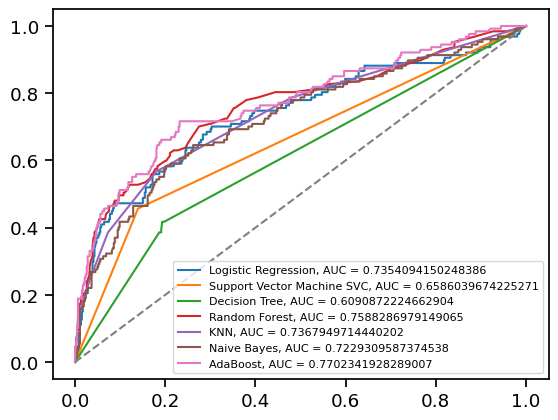

In [91]:
# Menampilkan grafik ROC-AUC
fpr_log, tpr_log, _ = roc_curve(y_test, y_pp_log)
roc_auc_log = roc_auc_score(y_test, y_pp_log)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred_test_svc)
roc_auc_svc = roc_auc_score(y_test, y_pred_test_svc)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pp_dt)
roc_auc_dt = roc_auc_score(y_test, y_pp_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pp_rf)
roc_auc_rf = roc_auc_score(y_test, y_pp_rf)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pp_knn)
roc_auc_knn = roc_auc_score(y_test, y_pp_knn)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pp_nb)
roc_auc_nb = roc_auc_score(y_test, y_pp_nb)
fpr_ab, tpr_ab, _ = roc_curve(y_test, y_pp_ab)
roc_auc_ab = roc_auc_score(y_test, y_pp_ab)

plt.figure(0).clf()
plt.plot(fpr_log, tpr_log, label='Logistic Regression, AUC = ' + str(roc_auc_log))
plt.plot(fpr_svc, tpr_svc, label='Support Vector Machine SVC, AUC = ' + str(roc_auc_svc))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree, AUC = ' + str(roc_auc_dt))
plt.plot(fpr_rf, tpr_rf, label='Random Forest, AUC = ' + str(roc_auc_rf))
plt.plot(fpr_knn, tpr_knn, label='KNN, AUC = ' + str(roc_auc_knn))
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes, AUC = ' + str(roc_auc_nb))
plt.plot(fpr_ab, tpr_ab, label='AdaBoost, AUC = ' + str(roc_auc_ab))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right', fontsize='8', bbox_to_anchor=(1, 0))
plt.show()

Statement :

- Dari hasil perbandingan evaluasi score f1, cross-val, dan roc-auc, diketahui bahwa AdaBoost memiliki pemodelan yang lebih baik dibandingkan pemodelan lainnya

## Hyperparameter Tunning

Save Base Model

In [92]:
# Membuat dataframe base model
all_reports = {}
score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train_ab),
    'train - recall' : recall_score(y_train, y_pred_train_ab),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_ab),
    'train - f1_score' : f1_score(y_train, y_pred_train_ab),
    'test - precision' : precision_score(y_test, y_pred_test_ab),
    'test - recall' : recall_score(y_test, y_pred_test_ab),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_ab),
    'test - f1_score' : f1_score(y_test, y_pred_test_ab),
}
all_reports['Baseline (Default Hyperparameter)'] = score_reports
pd.DataFrame(all_reports)

Baseline (Default Hyperparameter)
test - accuracy_score                           0.831366
test - f1_score                                 0.489796
test - precision                                0.695652
test - recall                                   0.377953
train - accuracy                                0.843948
train - f1_score                                0.529262
train - precision                               0.748201
train - recall                                  0.409449

Random Search

In [93]:
# variable untuk parameter
estimator = [DecisionTreeClassifier(), SVC()]
n_estimators = [1, 5, 10, 50, 100, 500]
learning_rate = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
random_grid = {'n_estimators': n_estimators,
               'estimator':estimator,
               'learning_rate':learning_rate,
               'algorithm':['SAMME', 'SAMME.R']
               }
random_grid

{'n_estimators': [1, 5, 10, 50, 100, 500],
 'estimator': [DecisionTreeClassifier(), SVC()],
 'learning_rate': [0.0, 0.2, 0.4, 0.6, 0.8, 1.0],
 'algorithm': ['SAMME', 'SAMME.R']}

In [94]:
# Menggunakan randomsearch
ab_randomcv = RandomizedSearchCV(estimator=AdaBoostClassifier(), 
                                 param_distributions=random_grid,
                                 n_iter=50,
                                 cv=5, 
                                 random_state=46, 
                                 n_jobs=-1, 
                                 scoring='f1')
ab_randomcv.fit(X_train_pred, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'estimator': [DecisionTreeClassifier(),
                                                      SVC()],
                                        'learning_rate': [0.0, 0.2, 0.4, 0.6,
                                                          0.8, 1.0],
                                        'n_estimators': [1, 5, 10, 50, 100,
                                                         500]},
                   random_state=46, scoring='f1')

In [95]:
print(ab_randomcv.best_estimator_)
print(ab_randomcv.best_params_)
print(ab_randomcv.best_index_)

AdaBoostClassifier(algorithm='SAMME', estimator=DecisionTreeClassifier(),
                   learning_rate=0.2)
{'n_estimators': 50, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(), 'algorithm': 'SAMME'}
37


In [96]:
# Best estimator
ab_randomcv_best = ab_randomcv.best_estimator_

F1 Score - Test Set   :  0.44736842105263164 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       466
           1       0.50      0.40      0.45       127

    accuracy                           0.79       593
   macro avg       0.68      0.65      0.66       593
weighted avg       0.77      0.79      0.78       593
 

Confusion Matrix      : 


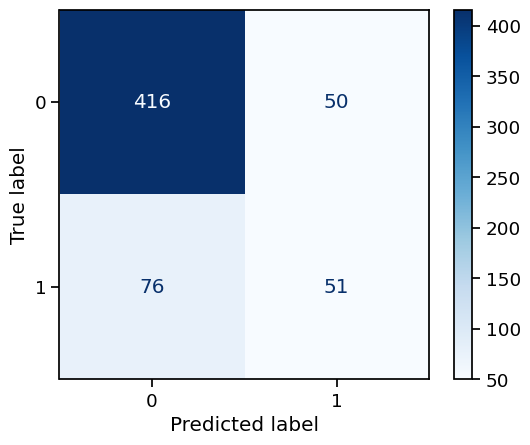

In [97]:
# Classofication Report
y_pred_test_abr = ab_randomcv_best.predict(X_test_pred)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_abr), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_abr), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(ab_randomcv_best, X_test_pred, y_test, cmap='Blues'))

In [98]:
# Memasukan report Random Search
score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train_ab),
    'train - recall' : recall_score(y_train, y_pred_train_ab),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_ab),
    'train - f1_score' : f1_score(y_train, y_pred_train_ab),
    'test - precision' : precision_score(y_test, y_pred_test_abr),
    'test - recall' : recall_score(y_test, y_pred_test_abr),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_abr),
    'test - f1_score' : f1_score(y_test, y_pred_test_abr),
}
all_reports['Random Search'] = score_reports
pd.DataFrame(all_reports)

Baseline (Default Hyperparameter)  Random Search
train - precision                               0.748201       0.748201
train - recall                                  0.409449       0.409449
train - accuracy                                0.843948       0.843948
train - f1_score                                0.529262       0.529262
test - precision                                0.695652       0.504950
test - recall                                   0.377953       0.401575
test - accuracy_score                           0.831366       0.787521
test - f1_score                                 0.489796       0.447368

Grid Search

In [99]:
# Variable Parameter
estimator = [DecisionTreeClassifier()]
n_estimators = [1, 5, 10, 50, 100, 500]
learning_rate = [0.2, 0.4, 0.6, 0.8, 1.0]
grid_parameters = {'n_estimators': n_estimators,
               'estimator':estimator,
               'learning_rate':learning_rate,
               'algorithm':['SAMME']
               }
grid_parameters

{'n_estimators': [1, 5, 10, 50, 100, 500],
 'estimator': [DecisionTreeClassifier()],
 'learning_rate': [0.2, 0.4, 0.6, 0.8, 1.0],
 'algorithm': ['SAMME']}

In [100]:
# Gunakan gridsearch
grid = GridSearchCV(AdaBoostClassifier(), grid_parameters, verbose = 3, refit = True, scoring = 'accuracy',
                    cv = 5, return_train_score = True, n_jobs = 1, error_score = 'raise')
grid.fit(X_train_pred, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END algorithm=SAMME, estimator=DecisionTreeClassifier(), learning_rate=0.2, n_estimators=1;, score=(train=0.994, test=0.699) total time=   0.0s
[CV 2/5] END algorithm=SAMME, estimator=DecisionTreeClassifier(), learning_rate=0.2, n_estimators=1;, score=(train=0.995, test=0.753) total time=   0.0s
[CV 3/5] END algorithm=SAMME, estimator=DecisionTreeClassifier(), learning_rate=0.2, n_estimators=1;, score=(train=0.995, test=0.768) total time=   0.0s
[CV 4/5] END algorithm=SAMME, estimator=DecisionTreeClassifier(), learning_rate=0.2, n_estimators=1;, score=(train=0.994, test=0.728) total time=   0.0s
[CV 5/5] END algorithm=SAMME, estimator=DecisionTreeClassifier(), learning_rate=0.2, n_estimators=1;, score=(train=0.995, test=0.726) total time=   0.0s
[CV 1/5] END algorithm=SAMME, estimator=DecisionTreeClassifier(), learning_rate=0.2, n_estimators=5;, score=(train=0.994, test=0.707) total time=   0.0s
[CV 2/5] END algorit

GridSearchCV(cv=5, error_score='raise', estimator=AdaBoostClassifier(),
             n_jobs=1,
             param_grid={'algorithm': ['SAMME'],
                         'estimator': [DecisionTreeClassifier()],
                         'learning_rate': [0.2, 0.4, 0.6, 0.8, 1.0],
                         'n_estimators': [1, 5, 10, 50, 100, 500]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [101]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_index_)

AdaBoostClassifier(algorithm='SAMME', estimator=DecisionTreeClassifier(),
                   learning_rate=0.6, n_estimators=10)
{'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(), 'learning_rate': 0.6, 'n_estimators': 10}
14


In [102]:
# Menggunakan best SVC untuk modeling
best_ab = AdaBoostClassifier(algorithm='SAMME', estimator=DecisionTreeClassifier(),
                   learning_rate=0.2)
best_ab.fit(X_train_pred, y_train)

AdaBoostClassifier(algorithm='SAMME', estimator=DecisionTreeClassifier(),
                   learning_rate=0.2)

In [103]:
# Melakukan prediksi
y_pred_train_bestab = best_ab.predict(X_train_pred)
y_pred_test_bestab = best_ab.predict(X_test_pred)

F1 Score - Test Set   :  0.45299145299145294 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       466
           1       0.50      0.42      0.45       127

    accuracy                           0.78       593
   macro avg       0.67      0.65      0.66       593
weighted avg       0.77      0.78      0.78       593
 

Confusion Matrix      : 


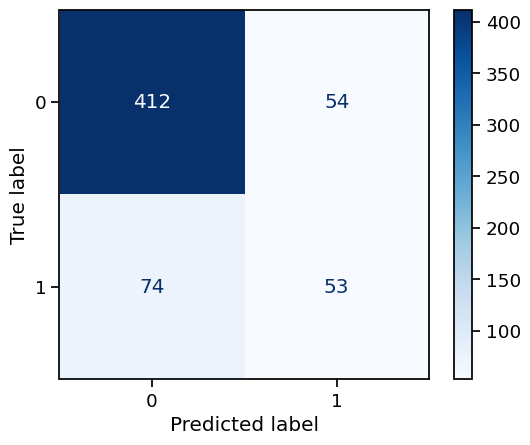

In [104]:
# Check Performance Model against Test-Set
y_pred_test_bestab = best_ab.predict(X_test_pred)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_bestab), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_bestab), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_ab, X_test_pred, y_test, cmap='Blues'))

In [105]:
# Save Classification Report into a Dictionary
score_reports = {
    'train - precision' : precision_score(y_train, y_pred_train_ab),
    'train - recall' : recall_score(y_train, y_pred_train_ab),
    'train - accuracy' : accuracy_score(y_train, y_pred_train_ab),
    'train - f1_score' : f1_score(y_train, y_pred_train_ab),
    'test - precision' : precision_score(y_test, y_pred_test_bestab),
    'test - recall' : recall_score(y_test, y_pred_test_bestab),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_bestab),
    'test - f1_score' : f1_score(y_test, y_pred_test_bestab),
}
all_reports['Grid Search'] = score_reports
pd.DataFrame(all_reports)

Baseline (Default Hyperparameter)  Random Search  \
train - precision                               0.748201       0.748201   
train - recall                                  0.409449       0.409449   
train - accuracy                                0.843948       0.843948   
train - f1_score                                0.529262       0.529262   
test - precision                                0.695652       0.504950   
test - recall                                   0.377953       0.401575   
test - accuracy_score                           0.831366       0.787521   
test - f1_score                                 0.489796       0.447368   

                       Grid Search  
train - precision         0.748201  
train - recall            0.409449  
train - accuracy          0.843948  
train - f1_score          0.529262  
test - precision          0.495327  
test - recall             0.417323  
test - accuracy_score     0.784148  
test - f1_score           0.452991

In [106]:
# Check ROC-AUC
print('ROC-AUC Test-set : ', roc_auc_score(y_test, y_pred_test_bestab), '\n')
print('ROC-AUC Train-set :', roc_auc_score(y_train, y_pred_train_bestab))

ROC-AUC Test-set :  0.6507215031597445 

ROC-AUC Train-set : 0.9897998106516879


Melakukan perubahan threshold untuk melihat performa model (recall)

In [107]:
# Melakukan perubahan threshold untuk mendapatkan recall maksimal
y_pred_new_bestab = best_ab.predict_proba(X_test_pred)
y_pred_new_test = np.where(y_pred_new_bestab[:,1] >= 0.7, 1, 0)

print(classification_report(y_test, y_pred_new_test))
print('Precision : ', precision_score(y_test, y_pred_new_test))
print('Recall    : ', recall_score(y_test, y_pred_new_test))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       466
           1       0.67      0.22      0.33       127

    accuracy                           0.81       593
   macro avg       0.74      0.60      0.61       593
weighted avg       0.79      0.81      0.77       593

Precision :  0.6666666666666666
Recall    :  0.2204724409448819


Statement :

- Setelah dilakukan tunning hasil recall terbaik ada pada GridseacrhCV karena nilai recall yang tinggi akan meminimalisir klien yang harusnya default tapi terprediksi tidak default

- Dari nilai ROC-AUC dapat dikatakan bahwa model termasuk over-fiting karena gap antara train dan test cukup jauh

- Setelah dilakukan pergantian threshold nilai recall semakin menurun artinya dengan menggunakan default (0.5) sudah memberikan nilai recall maksimal sebesar 0.41

# **X. Model Saving**

In [108]:
# Save File

# Modelling
with open('ab_model.pkl', 'wb') as file_1:
    pickle.dump(best_ab, file_1)

# Pre-processing

with open('scale_feat.pkl', 'wb') as file_2:
    pickle.dump(scaler, file_2)

with open('winsoriser.pkl', 'wb') as file_3:
    pickle.dump(windsoriser, file_3)
    
# List Numeric & Category
with open('num_cols_sc.txt', 'w') as file_4:
    json.dump(num_columns_sc, file_4)

with open('num_cols_nsc.txt', 'w') as file_5:
    json.dump(num_colums_nsc, file_5)

# **XII. Kesimpulan**

Exploratory Data Analysis :

- Sebanyak 2900 kartu kredit dengan rata rata limit balance 163,356 NT dollars standard deviasi 125,049 NT dollars dengan rentang limit balance dari 10,000 sampai 800,000

- Kebanyakan pemiliki kartu kredit memiliki umur rata-rata 35 tahun, seorang perempuan dengan level edukasi universitas dan lulus SMA, berstatus menikah dan belum menikah

- Hampir seluruh grafik histogram menunjukan distibusi data yang tidak normal

- Dari grafik scatterplot dapat diketahui bahwa data_pay dan data_bill_amt memiliki korelasi sedangkan pada other_data dan pay_amt tidak memiliki korelasi

Model Analysis :

- Diketahui dari ke-6 model yang telah dilakukan (default model) bahwa `AdaBoostClassifier` dengan f1 score, cross-val, dan roc-auc yang lebih baik dibandingkan dengan 5 model lainnya

- Model yang terbaik pada AdaBoost yaitu model dengan GridSeacrhCV karena menghasilkan nilai recall yang tinggi dibandingkan yang lainnya hal ini tentunya akan berpengaruh kepada hasil prediksi False negative dimana klien yang seharusnya default namun terprediksi tidak defaul sehingga nanti akan berakibat kerugian pada perusahaan

- Ditinjau dari nilai ROC-AUC train dan test memiliki selisih yang cukup besar sehingga pemodelan ini termasuk kedalam `over-fit`

- Nilai classification report yang ditampilkan pada test-set cukup kecil hal ini diakibatkan oleh imbalance data sehingga untuk langkah selanjutnya menggunakan re-sample data agar mengurangi imbalance pada data

# **XIII. Conceptual Problems**

1. Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !

2. Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !

3. Bagaimana cara memilih K yang optimal pada KNN ?

4. Jelaskan apa yang dimaksud dengan Cross Validation !

5. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

1. Criterion pada Decision Tree merupakan salah satu parameter pada Decision tree yang digunakan untuk mengevaluasi dan memilih atribut terbaik yang nantinya berguna untuk memisahkan data pada setiap simpul (node) dalam model Decision Tree. Criterion yang digunakan oleh saya yaitu criterion 'gini' karena digunakan untuk mengukur nilai probabilitas pemilihan kelas secara acak dari simpul (node)

2. Pruning merupakan salah satu teknik dalam modeling yang berbasis pohon dengan melibatkan pengurangan ukuran pohon dimana menghapus cabang-cabang yang tidak memberikan peningkatan secara signifikan kedalam hasil prediksi atau memperbaiki kinerja model pada data yang sebelumnya tidak diketahui.

    Fungsi dari pruning yaitu dapat mengurangi over-fitting, meingkatkan interpretabilitas, dan meng-efesiensikan waktu untuk komputasi

    Jenis Pruning yaitu ada Pre-Pruning dan Post-Pruning

3. Cara memilih K yang optimal pada KNN tentunya dapat dilakukan dengan menggunakan RandomSeacrhCV atau GridSearchCV karena lebih sistematis, sehingga nantinya nilai K terbaik akan ditemukan dan optimal

4. Cross Validation merupakan suatu metode statistik yang digunakan untuk meng-evaluasi kinerja dan kemampuan suatu model dalam memodelkan suatu data

5. Accuracy : merupakan nilai akurasi suatu model dalam memprediksi kelas yang benar (True Positive dan True Negative). Cocok digunakan pada saat kelas target memiliki distribusi yang seimbang

    Precision : merupakan nilai prediksi positive dari yang aktual positive. Cocok digunakan untuk meminimalisir jumlah False Positive

    Recall : merupakan nilai aktual positive yang dari yang terprediksi positive. Cocok digunakan untuk meminimalisir jumlah False Negative

    F1 Score : merupakan nilai gabungan dari presisi dan recall. Cocok digunakan untuk mempertimbangkan secara seimbang antara presisi dan recall